# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

В датасете представлены различные данные, которые можно поделить на 3 категории:
1) Данные о самой недвижимости: этаж, кол-во комнат, площадь всей квартиры, площадь кухни, площадь жилой зоны и кол-во этажей в доме.
2) Данные о местоположении недвижимости: в каком населенном пункте находится, как далеко от центра, сколько рядом прудов и парков, расстояние до ближайшего аэропорта и центра города.
3) Данные об объявлении: дата размещения, цена, сколько дней прошло с момента публикации до продажи.

**Table of contents**<a id='toc0_'></a>    
1. [Подготовка                   ](#toc1_)    
1.1. [Установка библиотек        ](#toc1_1_)    
1.2. [Конфигурация        ](#toc1_2_)    
1.3. [Сервисные функции        ](#toc1_3_)    
2. [Данные                   ](#toc2_)    
2.1. [Объяснение признаков                  ](#toc2_1_)    
2.2. [Изучение данных                   ](#toc2_2_)    
2.3. [Обработка datetime столбца                  ](#toc2_3_)    
3. [Пропущенные значения                   ](#toc3_)    
3.1. [Обработка столбца `locality_name`      ](#toc3_1_)    
3.2. [Обработка столбца `balcony`                  ](#toc3_2_)    
3.3. [Обработка столбца `is_apartment`                  ](#toc3_3_)    
3.4. [Обработка столбца `parks_around3000`                  ](#toc3_4_)    
3.5. [Обработка столбца `ponds_around3000`                  ](#toc3_5_)    
3.6. [Обработка столбцов `living_area` и `kitchen_area`         ](#toc3_6_)    
3.7. [Обработка столбца `floors_total`      ](#toc3_7_)    
3.8. [Обработка столбца `ceiling_height`      ](#toc3_8_)    
3.9. [Вывод по пропущенным значениям          ](#toc3_9_)    
4. [Обработка выбросов и аномальных значений           ](#toc4_)    
4.1. [Изучение выбросов и аномальных значений по столбцам        ](#toc4_1_)    
4.2. [Столбец `ceiling_height`          ](#toc4_2_)    
4.3. [Столбец `total_images`      ](#toc4_3_)    
4.4. [Столбец `last_price`      ](#toc4_4_)    
4.5. [Столбец `total_area`      ](#toc4_5_)    
4.6. [Столбец `rooms`   ](#toc4_6_)    
4.7. [Столбец `floors_total`   ](#toc4_7_)    
4.8. [Столбец `floor_num`   ](#toc4_8_)    
4.9. [Столбец `kitchen_area`   ](#toc4_9_)    
4.10. [Столбец `living_area`   ](#toc4_10_)    
4.11. [Столбец `days_exposition`   ](#toc4_11_)    
4.12. [Столбцы с расстояниями   ](#toc4_12_)    
4.13. [Вывод по аномальным значениям         ](#toc4_13_)    
5. [Обработка дубликатов               ](#toc5_)    
5.1. [Вывод по дубликатам          ](#toc5_1_)    
6. [ Генерация новых столбцов (feature engineering)  ](#toc6_)    
7. [Проверка типов данных  ](#toc7_)    
8. [ EDA (исследовательский анализ данных)                  ](#toc8_)    
8.1. [Изучение скорости продаж квартир         ](#toc8_1_)    
8.2. [Зависимость цены квартиры от расстояния до центра         ](#toc8_2_)    
8.3. [Средняя цена квадратного метра в 10 самых популярных населенных пунктах  ](#toc8_3_)    
8.4. [Факторы с наибольшим влиянием на цену       ](#toc8_4_)    
9. [Общий вывод                   ](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>Подготовка                    [&#8593;](#toc0_)

### 1.1. <a id='toc1_1_'></a>Установка библиотек         [&#8593;](#toc0_)

In [1]:
%pip install --upgrade prettytable -q
%pip install --upgrade termcolor -q
%pip install --upgrade missingno -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from prettytable import PrettyTable
from pandas.api.types import is_numeric_dtype
from termcolor import colored
from IPython.display import display

### 1.2. <a id='toc1_2_'></a>Конфигурация         [&#8593;](#toc0_)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

### 1.3. <a id='toc1_3_'></a>Сервисные функции         [&#8593;](#toc0_)

In [4]:
def print_table_about_outliers(data: pd.DataFrame) -> None:
    table = PrettyTable()

    table.field_names = ['Столбец', 'Диапазон нормальных значений', 'Выходов за нижнюю границу', 'Выходов за верхнюю границу', 'Всего выбросов']

    for column in data.columns:
        if not is_numeric_dtype(data[column].dtype) or data[column].nunique() < 3:
            table.add_row([column, 'N/A', 'N/A', 'N/A', 'N/A'])
            continue
        
        q1, q3 = data[column].quantile([0.25, 0.75])
        iqr: float = q3 - q1
        lower_lim: float = q1 - 1.5 * iqr
        upper_lim: float = q3 + 1.5 * iqr
        
        num_of_values_under_lower_lim = len(data.query(f'{column} < @lower_lim'))
        num_of_values_below_upper_lim = len(data.query(f'{column} > @upper_lim'))
        
        table.add_row([
            column,
            f'[{lower_lim:_.2f}; {upper_lim:_.2f}]',
            colored(f'{num_of_values_under_lower_lim} ({num_of_values_under_lower_lim / len(data):.2%})', 'green' if num_of_values_under_lower_lim == 0 else 'red'),
            colored(f'{num_of_values_below_upper_lim} ({num_of_values_below_upper_lim / len(data):.2%})', 'green' if num_of_values_below_upper_lim == 0 else 'red'),
            colored(f'{num_of_values_under_lower_lim + num_of_values_below_upper_lim} ({(num_of_values_under_lower_lim + num_of_values_below_upper_lim) / len(data):.2%})', 'green' if (num_of_values_under_lower_lim + num_of_values_below_upper_lim )== 0 else 'red')
        ])
        
    print(table)

In [5]:
def drop_rows_with_outliers(df: pd.DataFrame,
                           col: str,
                           only_under_low_lim: bool = False,
                           only_under_up_lim: bool = False
                           ) -> pd.DataFrame:
    if (only_under_low_lim == True and only_under_up_lim == True):
        raise ValueError('"only_under_low_lim" and "only_under_up_lim" can\'t be True at the same time.')

    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    low_lim = q1 - 1.5 * iqr
    up_lim = q3 + 1.5 * iqr
    
    if only_under_low_lim == True:
        return df.query(f'{col} >= @low_lim')
    
    if only_under_up_lim == True:
        return df.query(f'{col} <= up_lim')
    
    return df.query(f'@low_lim <= {col} <= @up_lim')  

In [6]:
def delete_outliers_values(df: pd.DataFrame,
                           col: str,
                           only_under_low_lim: bool = False,
                           only_under_up_lim: bool = False
                           ) -> pd.DataFrame:
    if (only_under_low_lim == True and only_under_up_lim == True):
        raise ValueError('"only_under_low_lim" and "only_under_up_lim" can\'t be True at the same time.')

    df = df.copy()

    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    low_lim = q1 - 1.5 * iqr
    up_lim = q3 + 1.5 * iqr
    
    if only_under_low_lim == True:
        mask = df[col] < low_lim
        df.loc[mask, col] = np.nan
    elif only_under_up_lim == True:
        mask = df[col] > up_lim
        df.loc[mask, col] = np.nan
    else:
        mask = (df[col] < low_lim) | (df[col] > up_lim)
        df.loc[mask, col] = np.nan

    return df

In [7]:
def draw_box_and_hist_plots(data: pd.DataFrame, col: str, bins: int = 20) -> None:
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    sns.boxplot(data, x=col, orient='h', ax=ax1)
    sns.histplot(data, x=col, bins=bins, ax=ax2)
    ax2.grid()

## 2. <a id='toc2_'></a>Данные                    [&#8593;](#toc0_)

In [8]:
data = pd.read_csv('./data/data.csv', sep='\t')

Так как `floor` является функций в Python, использование этого слова в качестве названия столбца вызывает проблемы. Поэтому переименуем.

In [9]:
data = data.rename(columns={'floor': 'floor_num'})

### 2.1. <a id='toc2_1_'></a>Объяснение признаков                   [&#8593;](#toc0_)

|Название|Описание|
|:--:|--|
|`airports_nearest`|расстояние до ближайшего аэропорта в метрах (м)|
|`balcony`|число балконов|
|`ceiling_height`|высота потолков (м)|
|`cityCenters_nearest`|расстояние до центра города (м)|
|`days_exposition`|сколько дней было размещено объявление (от публикации до снятия)|
|`first_day_exposition`|дата публикации|
|`floor_num`|этаж|
|`floors_total`|всего этажей в доме|
|`is_apartment`|апартаменты (булев тип)|
|`kitchen_area`|площадь кухни в квадратных метрах (м²)|
|`last_price`|цена на момент снятия с публикации|
|`living_area`|жилая площадь в квадратных метрах (м²)|
|`locality_name`|название населённого пункта|
|`open_plan`|свободная планировка (булев тип)|
|`parks_around3000`|число парков в радиусе 3 км|
|`parks_nearest`|расстояние до ближайшего парка (м)|
|`ponds_around3000`|число водоёмов в радиусе 3 км|
|`ponds_nearest`|расстояние до ближайшего водоёма (м)|
|`rooms`|число комнат|
|`studio`|квартира-студия (булев тип)|
|`total_area`|общая площадь квартиры в квадратных метрах (м²)|
|`total_images`|число фотографий квартиры в объявлении|

### 2.2. <a id='toc2_2_'></a>Изучение данных                    [&#8593;](#toc0_)

In [10]:
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_num,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8944,14,8500000.0,69.00,2017-07-07T00:00:00,3,NaN,9.0,43.0,5,NaN,False,False,9.0,0.0,Санкт-Петербург,37473.0,12995.0,0.0,NaN,0.0,NaN,95.0
8260,5,3750000.0,45.69,2016-08-07T00:00:00,2,2.54,5.0,28.9,3,NaN,False,False,6.4,NaN,Санкт-Петербург,35710.0,10216.0,1.0,502.0,0.0,NaN,595.0
612,18,35000000.0,135.00,2017-06-17T00:00:00,3,NaN,15.0,60.0,9,NaN,False,False,23.4,0.0,Санкт-Петербург,27179.0,5881.0,1.0,601.0,0.0,NaN,5.0
12826,12,4050000.0,40.40,2017-06-21T00:00:00,1,NaN,27.0,16.5,21,NaN,False,False,15.5,NaN,посёлок Парголово,52726.0,18900.0,0.0,NaN,0.0,NaN,321.0
1330,8,8045000.0,69.20,2017-04-21T00:00:00,2,NaN,10.0,43.7,2,NaN,False,False,9.7,NaN,Санкт-Петербург,23617.0,5223.0,0.0,NaN,1.0,874.0,409.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor_num             23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [12]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor_num,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


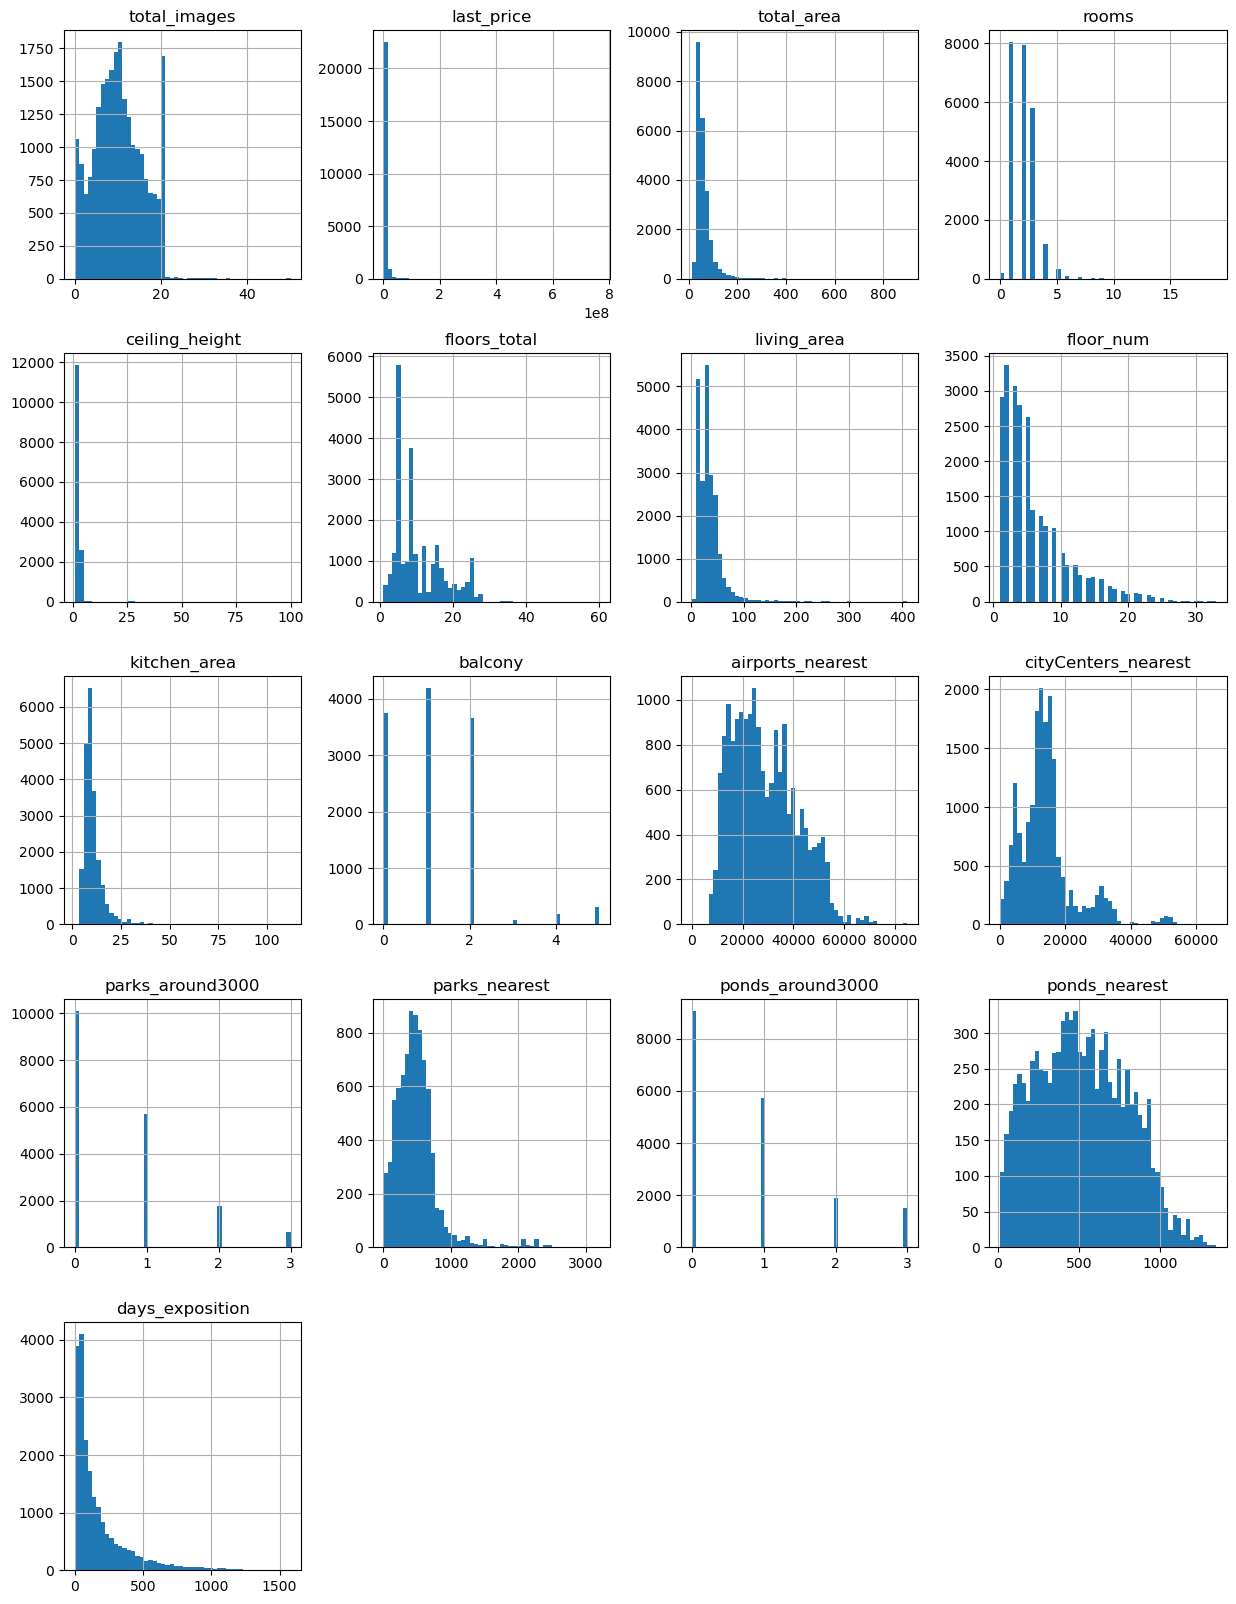

In [13]:
data.hist(bins=50, figsize=(15, 20));

In [14]:
data.duplicated().sum()

0

**Первые выводы по данным**

- Не все столбцы имеют верные типы данных. Например, столбец с датой и логическое значение `is_apartment` представлены в виде строк.
- Присутствует большое количество пропусков. В каких-то столбцах (например, `is_apartment`) процент пропусков составляет более `88%`.
- По гистограммам видно, что бОльшая часть числовых столбцов имеют выбросы. Чаще всего выбросы находятся в правой части графика, то есть значения сильно больше медианы и выходят за границу нормальных значений `Q3 + 1.5 * IQR`.
- Полных дубликатов нет, однако возможны неявные дубликаты в текстовых столбцах (`locality_name`).

### 2.3. <a id='toc2_3_'></a>Обработка datetime столбца                   [&#8593;](#toc0_)

При загрузке столбец с датой и временем имеет строковый тип данных. Однако для дальнейшей работы данный столбец необходимо привести к соответствующему типа данных с помощью  `pd.to_datetime`.

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

## 3. <a id='toc3_'></a>Пропущенные значения                    [&#8593;](#toc0_)

In [16]:
data.isna().sum().sort_values()

total_images                0
open_plan                   0
floor_num                   0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

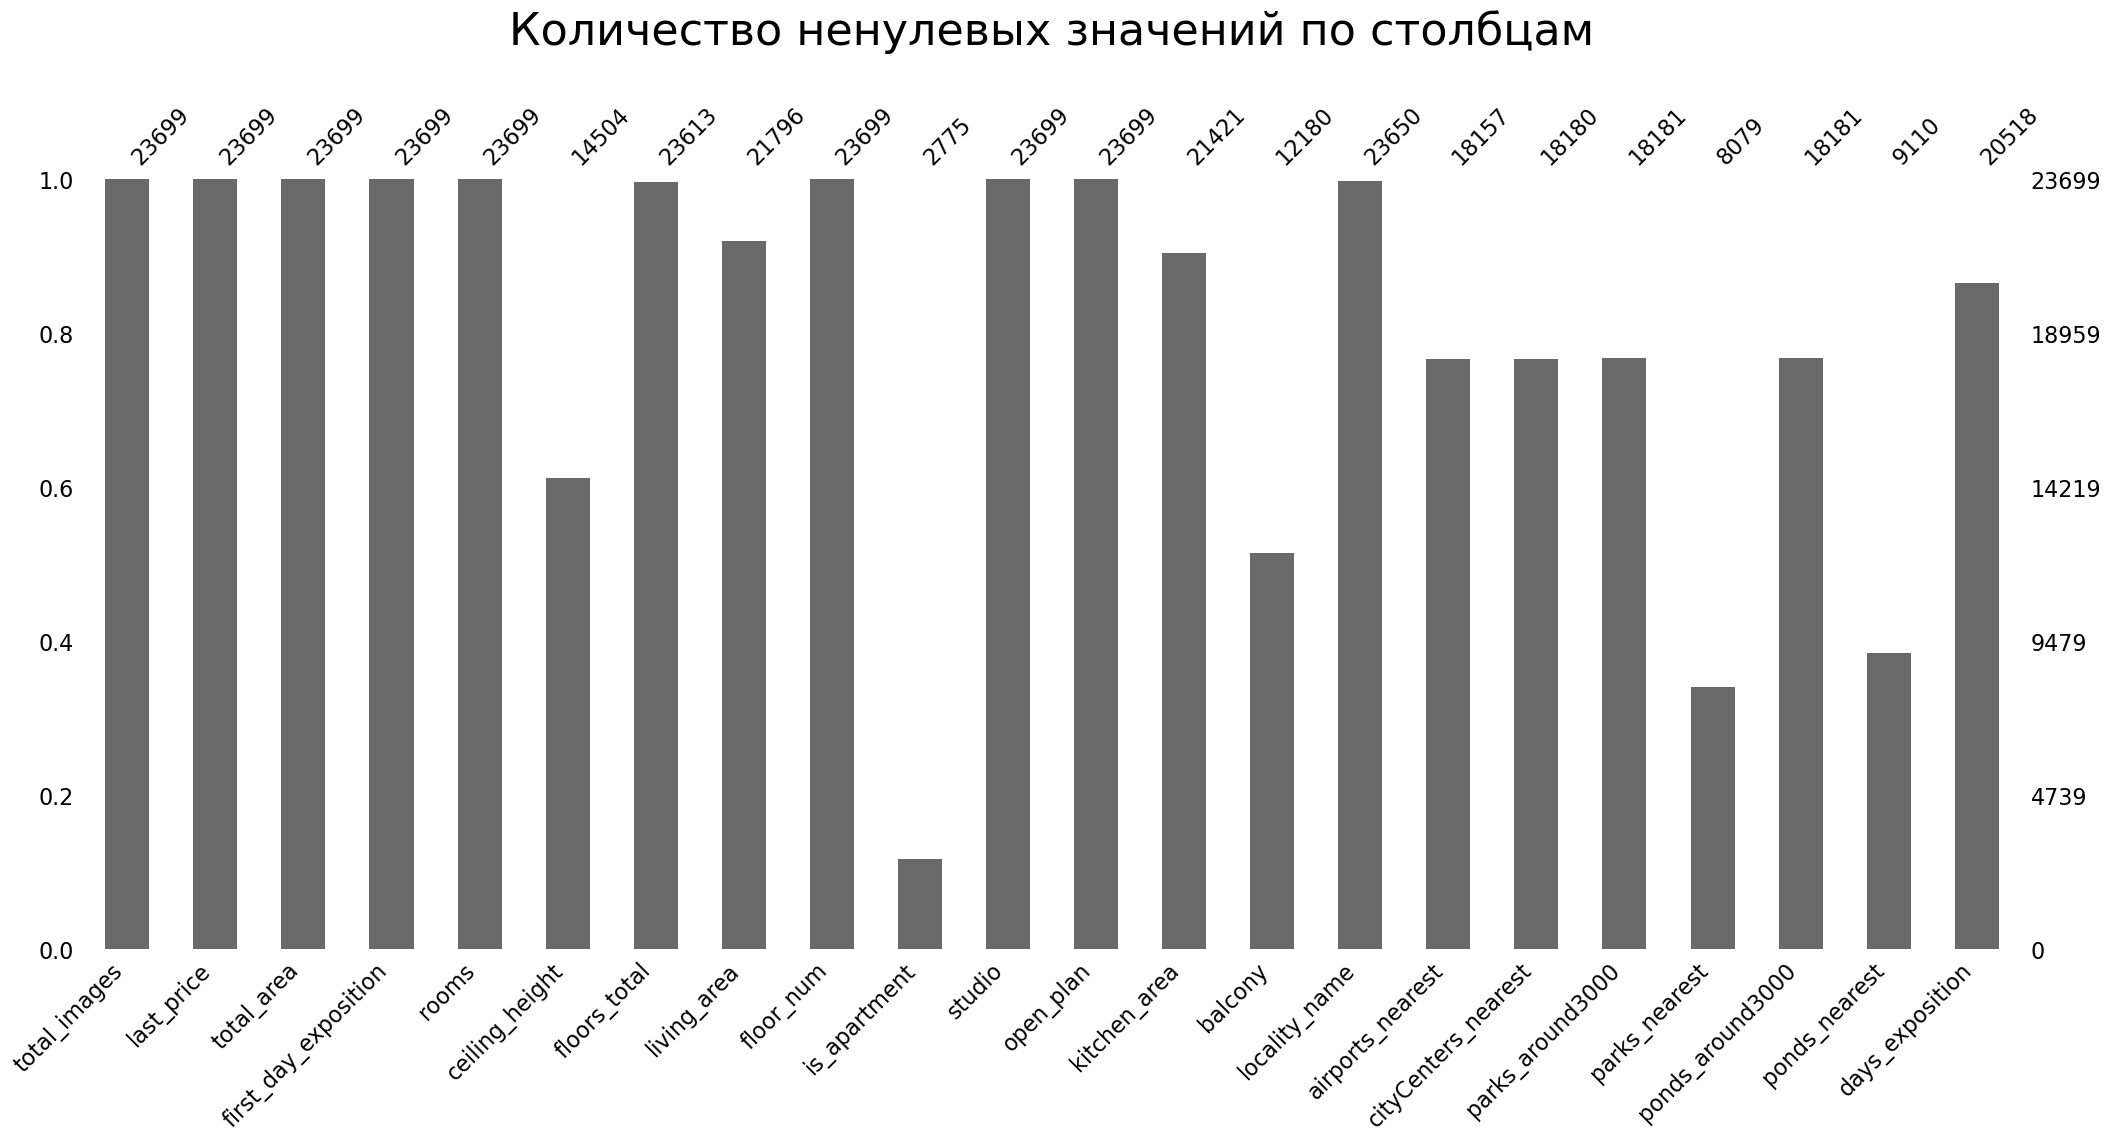

In [17]:
msno.bar(data)
plt.title('Количество ненулевых значений по столбцам\n', fontdict={'size': 32});

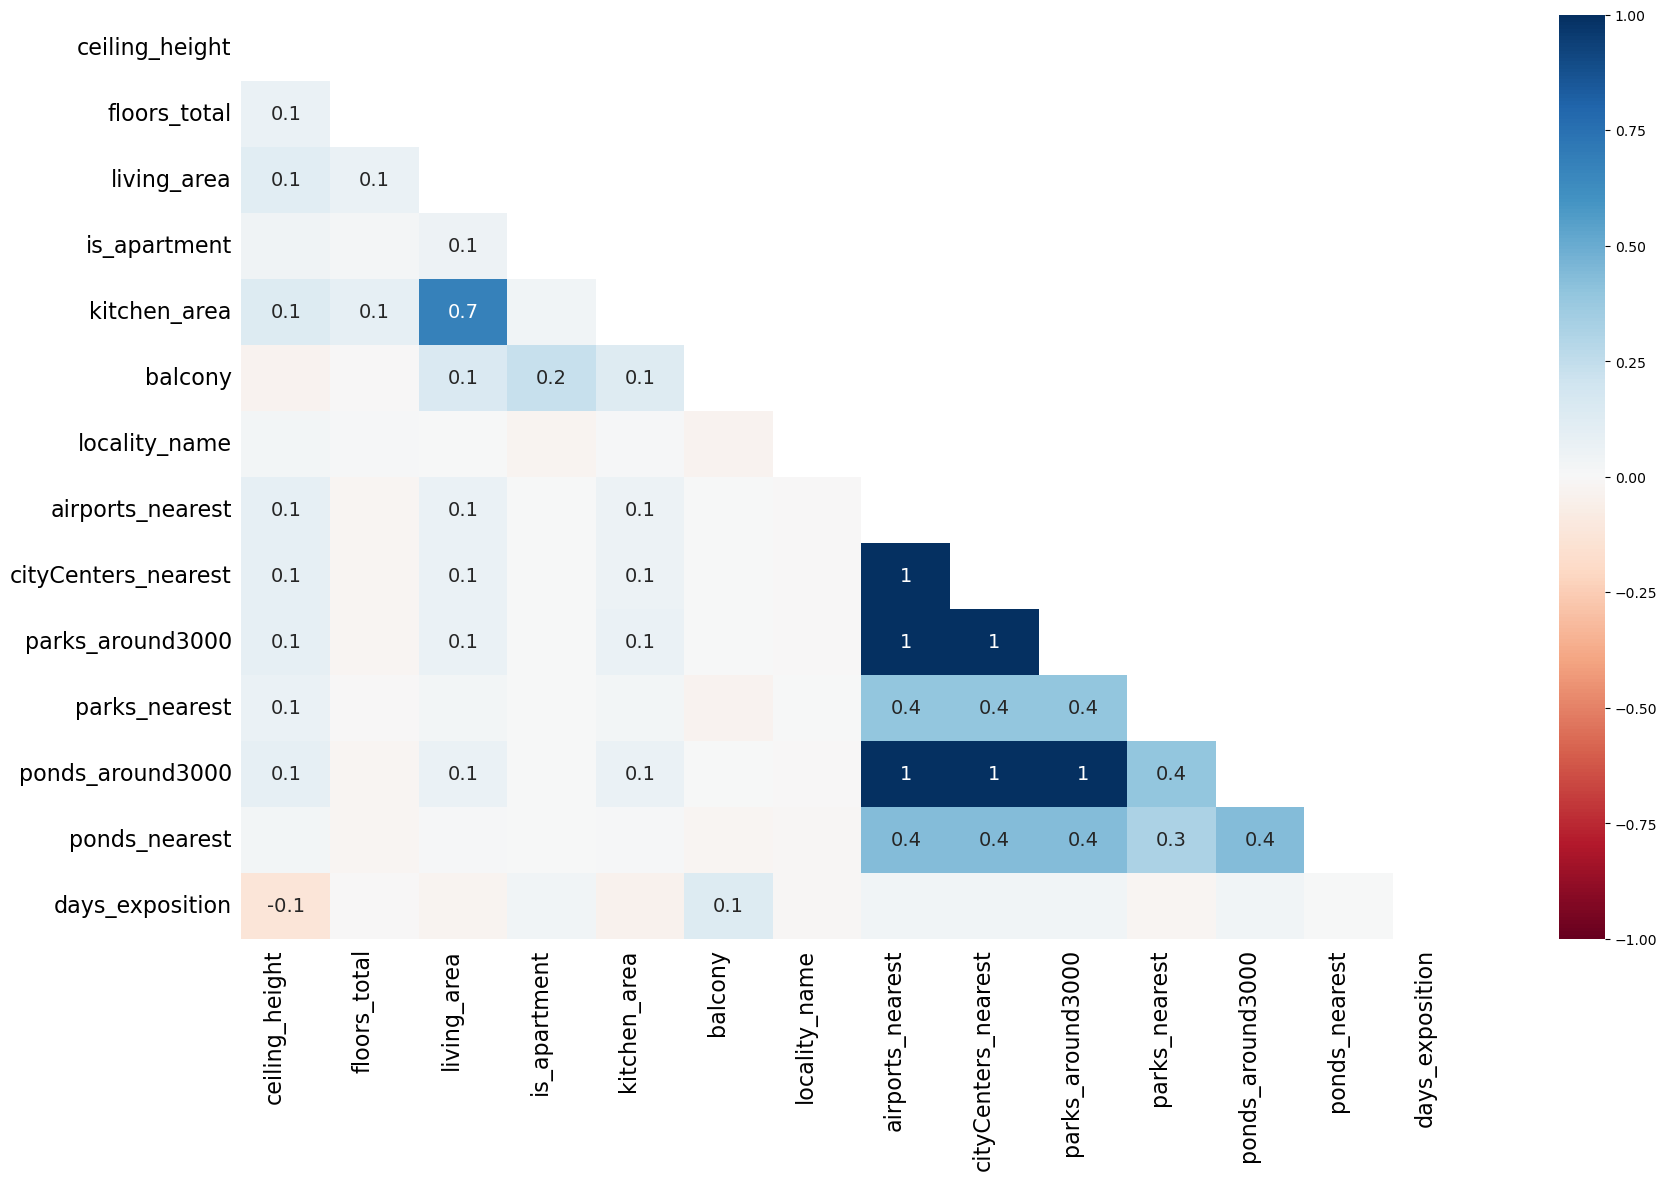

In [18]:
msno.heatmap(data)
plt.xticks(rotation=90);

**Откуда могли взяться пропуски?**

Появление пропусков в датасете имеет различные причины. Глобально можно выделить 2 категории: 
1. Случайные пропуски
2. Намеренные пропуски.

К 1 категории можно отнести технические ошибки (например, при выгрузке данных) и человеческий фактор (ошибка человека при внесении данных, например).

К намеренным пропускам в первую очередь относятся признаки, для которых значение отсутствует. Например, в столбце `days_exposition`, который хранит информацию о числе дней между публикацией объявления и его снятием. В случае если объявление ещё не снято, то значение этого признака просто не существует.

Также существует некоторая промежуточная категория. Например, число балконов. Если пользователь не указал число балконов - скорее всего их нет. Однако тут могли оказаться квартиры с балконами, данные о которых были неверно загружены. В итоге, пропуск вроде бы намеренный, но есть вероятность, что он все же случайный.

**Наблюдения о пропусках**

В данном датасете прослеживаются закономерности о пропусках. Если информация отсутствует в одном из столбцов из списка [`ponds_around3000`; `parks_around3000`; `airports_nearest`; `cityCenters_nearest`], то данные c огромной долей вероятности отсутствуют во всех 4 столбцах. И если это случилось, то данные скорее всего также отсутствуют в столбцах `parks_nearest` и `ponds_nearest`.

Так как эти данные были получены автоматически из геосервисов, то это говорит об определенных закономерностях. Изучим её подробнее.

In [19]:
mask = data['ponds_around3000'].isna()
data[mask].sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_num,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21848,19,3300000.0,51.2,2017-02-27,2,2.57,5.0,30.7,2,NaN,False,False,8.9,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,560.0
1866,9,1900000.0,33.5,2017-12-20,1,2.60,5.0,17.5,5,NaN,False,False,8.3,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,318.0
5353,9,2950000.0,26.0,2019-04-02,1,NaN,24.0,20.0,8,False,False,False,NaN,2.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4032,23,4500000.0,81.0,2017-01-18,3,2.60,10.0,58.0,4,NaN,False,False,8.5,2.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,418.0
2142,13,3500000.0,42.7,2017-11-22,1,2.75,10.0,20.0,10,NaN,False,False,10.8,2.0,деревня Старая,NaN,NaN,NaN,NaN,NaN,NaN,493.0


In [20]:
data[mask].isna().sum().sort_values()

total_images               0
open_plan                  0
floor_num                  0
rooms                      0
studio                     0
total_area                 0
first_day_exposition       0
last_price                 0
locality_name              8
floors_total              10
living_area              623
kitchen_area             715
days_exposition          865
ceiling_height          2575
balcony                 2710
is_apartment            4890
airports_nearest        5518
cityCenters_nearest     5518
parks_around3000        5518
parks_nearest           5518
ponds_around3000        5518
ponds_nearest           5518
dtype: int64

In [21]:
round((data.loc[mask, 'locality_name'].value_counts() / data.pivot_table(index='locality_name', aggfunc='count').max(axis=1)).sort_values() * 100, 2)

locality_name
Колпино                                                      0.30
Санкт-Петербург                                              0.39
Ломоносов                                                    0.75
посёлок Шушары                                               0.91
Кронштадт                                                    1.04
Красное Село                                                 1.12
поселок Мурино                                              94.12
посёлок Щеглово                                             95.65
поселок Тёсово-4                                           100.00
поселок Торковичи                                          100.00
поселок Терволово                                          100.00
поселок Тельмана                                           100.00
поселок Суходолье                                          100.00
Бокситогорск                                               100.00
поселок Сумино                                             100

Информация о местоположении отсутствует для различных деревень, поселков и небольших населенных пунктах. Скорее всего данные пропуски являются намеренными и имеют значение, что такое понятие, как, например, расстояние до аэропорта, не применимо для данных населенных пунктах.

### 3.1. <a id='toc3_1_'></a>Обработка столбца `locality_name`       [&#8593;](#toc0_)

Данное поле является ключевым. Если местоположение неизвестно, квартира может быть из любого другого города, что может негативно сказаться на исследовании. Поэтому от этих данных необходимо избавиться.

Записей, где местоположение неизвестно всего `49`, что составляет всего `0.21%`. Спокойно удалим их.

In [22]:
data = data[~data['locality_name'].isna()]

### 3.2. <a id='toc3_2_'></a>Обработка столбца `balcony`                   [&#8593;](#toc0_)

Если количество балконов не указано, скорее всего их просто нет  данном помещении. Поэтому заполним все отсутствующие значения в этом столбце значением `0`.

In [23]:
data['balcony'] = data['balcony'].fillna(0).astype(int)

### 3.3. <a id='toc3_3_'></a>Обработка столбца `is_apartment`                   [&#8593;](#toc0_)

Если тип жилья не указан, скорее всего значение признака ложное. Поэтому заполним все отсутствующие значения в этом столбце значением `0`.

In [24]:
data['is_apartment'] = data['is_apartment'].replace({False: 0, True: 1}).fillna(0).astype('int')

### 3.4. <a id='toc3_4_'></a>Обработка столбца `parks_around3000`                   [&#8593;](#toc0_)

Если количество парков не указано, скорее всего их нет. Поэтому заполним все отсутствующие значения в этом столбце значением `0`.

In [25]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')

### 3.5. <a id='toc3_5_'></a>Обработка столбца `ponds_around3000`                   [&#8593;](#toc0_)

Если количество прудов не указано, скорее всего их нет. Поэтому заполним все отсутствующие значения в этом столбце значением `0`.

In [26]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

### 3.6. <a id='toc3_6_'></a>Обработка столбцов `living_area` и `kitchen_area`          [&#8593;](#toc0_)

Недвижимость без жилой зоны - редкость. Скорее всего данные пропущены случайно. Поэтому заполним пропуски следующим образом.

In [27]:
# Ищем соотношения между кухонной и общей площадью
data['living_rate'] = data['living_area'] / data['total_area']

# Ищем соотношения между жилой и общей площадью
data['kitchen_rate'] = data['kitchen_area'] / data['total_area']

# Выбираем среднее соотношение, свойственное для квартир
rates = data.pivot_table(index='rooms', values=['living_rate', 'kitchen_rate'], aggfunc='median').median()

# Заменяем пропуски в площадях, в соотношении, определенном на предыдущем шаге
# Также учитываем, чтобы жилая и кухонная площадь не превосходили 90% общей площади
mask = (data['living_area'].isna()) | (data['kitchen_area'].isna()) | ((data['kitchen_area'] + data['living_area']) > data['total_area'] * 0.9)
data.loc[mask, ['living_area', 'kitchen_area']] =\
    pd.DataFrame({'living_area': data['total_area'] * rates['living_rate'], 'kitchen_area': data['total_area'] * rates['kitchen_rate']})
    
data = data.drop(['living_rate', 'kitchen_rate'], axis=1)

Проверим результаты заполнения:

In [28]:
((data['kitchen_area'] + data['living_area']) > data['total_area'] * 0.9).sum()

0

### 3.7. <a id='toc3_7_'></a>Обработка столбца `floors_total`       [&#8593;](#toc0_)

In [29]:
data_with_no_floors_total = data[data['floors_total'].isna()]
data_with_no_floors_total.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_num,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16668,0,15950000.0,108.00,2017-10-24,3,2.80,NaN,71.257222,3,0,False,False,11.064001,0,Санкт-Петербург,26402.0,5249.0,0,NaN,2,444.0,91.0
23590,0,21187872.0,123.30,2017-04-25,3,NaN,NaN,50.400000,18,0,False,False,23.600000,0,Санкт-Петербург,19095.0,4529.0,0,NaN,0,NaN,104.0
4617,4,4275062.0,61.20,2017-04-27,2,NaN,NaN,32.000000,12,0,False,False,12.200000,0,Санкт-Петербург,22041.0,17369.0,0,NaN,1,374.0,72.0
10058,9,3350000.0,25.00,2018-09-10,1,2.65,NaN,17.000000,21,0,False,False,3.500000,0,посёлок Шушары,NaN,NaN,0,NaN,0,NaN,23.0
14094,5,3290000.0,33.00,2018-02-01,1,NaN,NaN,21.773040,17,0,False,False,3.380667,0,деревня Новое Девяткино,NaN,NaN,0,NaN,0,NaN,440.0
20146,16,3850000.0,36.00,2018-10-12,1,NaN,NaN,19.000000,15,0,False,False,8.500000,0,посёлок Стрельна,28276.0,23454.0,0,NaN,0,NaN,183.0
5784,4,4262941.0,59.90,2017-04-02,2,NaN,NaN,31.700000,18,0,False,False,11.900000,0,Санкт-Петербург,22041.0,17369.0,0,NaN,1,374.0,127.0
3831,5,4850000.0,37.40,2019-03-02,1,NaN,NaN,24.676112,7,0,False,False,3.831423,0,Санкт-Петербург,NaN,NaN,0,NaN,0,NaN,NaN
10351,4,5380992.0,110.72,2015-10-09,4,NaN,NaN,73.051848,4,0,False,False,11.342650,0,поселок городского типа Токсово,NaN,NaN,0,NaN,0,NaN,251.0
10319,10,3216089.0,35.79,2018-10-01,1,NaN,NaN,23.613852,8,0,False,False,3.666487,0,Санкт-Петербург,47303.0,25866.0,1,251.0,1,350.0,145.0


Была вероятность, что суммарно количество этажей не указано для частных домов. Однако гипотеза не подтвердилась.

Поэтому заполним значения следующим образом, чтобы не менять форму распределения данных: если не указано общее количество этажей - предположим, что указанный этаж и является последним, но не меньше 5ого.

In [30]:
def suggest_total_floors(floor_num: int, min_total_floors: int = 5) -> int:
    return max(floor_num, min_total_floors)

In [31]:
data['floors_total'] = data['floors_total'].fillna(data['floor_num'].apply(suggest_total_floors))

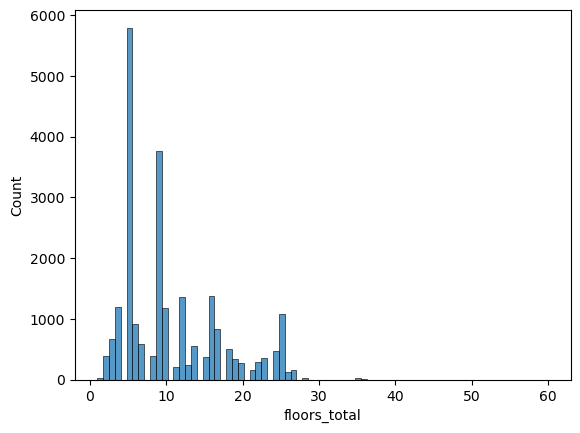

In [32]:
sns.histplot(data, x='floors_total');

### 3.8. <a id='toc3_8_'></a>Обработка столбца `ceiling_height`       [&#8593;](#toc0_)

Высота потолка не может быть нулевой или отсутствовать. Значит, скорее всего, данные пропущены случайно. Заполним их медианой.

In [33]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

### 3.9. <a id='toc3_9_'></a>Вывод по пропущенным значениям           [&#8593;](#toc0_)

Убедимся, что пропуски остались только в тех столбцах, где восстановить значение невозможно или не имеет смысла.

In [34]:
data.isna().sum().sort_values()

total_images                0
ponds_around3000            0
parks_around3000            0
locality_name               0
balcony                     0
kitchen_area                0
open_plan                   0
is_apartment                0
studio                      0
living_area                 0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
floor_num                   0
days_exposition          3180
cityCenters_nearest      5511
airports_nearest         5534
ponds_nearest           14565
parks_nearest           15586
dtype: int64

В итоге, столбцы были обработаны следующим образом:

- Если природа появления пропусков ясна - значения (по возможности) заполнены или оставлены `NaN` если это ожидаемое значение.
- Если причина появления пропусков НЕ ясна - данные заполнены медианным значением.

Более полная информация представлены в таблице ниже.

|Столбец|Способ обработки пропусков|
|:--:|--|
|`airports_nearest`|Не подлежит заполнению|
|`balcony`|Заполнены ОЗ|
|`ceiling_height`|Заполнены медианой|
|`cityCenters_nearest`|Не подлежит заполнению|
|`days_exposition`|Не подлежит заполнению|
|`floors_total`|Заполнены по номеру этажа, но не меньше 5|
|`is_apartment`|Заполнены ОЗ|
|`kitchen_area`|Заполнены через соотношение по комнатам|
|`living_area`|Заполнены через соотношение по комнатам|
|`locality_name`|Строки удалены|
|`parks_around3000`|Заполнены ОЗ|
|`parks_nearest`|Не подлежит заполнению|
|`pounds_around3000`|Заполнены ОЗ|
|`ponds_nearest`|Не подлежит заполнению|


**ОЗ - ожидаемое значение. То есть значение, которе скорее всего должно быть на месте пропуска.*

---

## 4. <a id='toc4_'></a>Обработка выбросов и аномальных значений            [&#8593;](#toc0_)

### 4.1. <a id='toc4_1_'></a>Изучение выбросов и аномальных значений по столбцам         [&#8593;](#toc0_)

In [35]:
print_table_about_outliers(data)

+----------------------+--------------------------------+---------------------------+----------------------------+----------------+
|       Столбец        |  Диапазон нормальных значений  | Выходов за нижнюю границу | Выходов за верхнюю границу | Всего выбросов |
+----------------------+--------------------------------+---------------------------+----------------------------+----------------+
|     total_images     |         [-6.00; 26.00]         |         0 (0.00%)         |         25 (0.11%)         |   25 (0.11%)   |
|      last_price      | [-1_698_500.00; 11_897_500.00] |         0 (0.00%)         |        2055 (8.69%)        |  2055 (8.69%)  |
|      total_area      |        [-4.55; 114.25]         |         0 (0.00%)         |        1244 (5.26%)        |  1244 (5.26%)  |
| first_day_exposition |              N/A               |            N/A            |            N/A             |      N/A       |
|        rooms         |         [-2.00; 6.00]          |         0 (0.00%) 

***Дисклеймер**: полностью удалять строки с выбросами нецелесообразно. Так как в этой строке выброс может быть только в одном из столбцов. И при удалении этой строки, мы потеряем все остальные признаки, которые могли быть полезны. Поэтому поступим следующим образом:*


- *Если причина выбросов ясна - восстановим данные.*

- *Иначе - заменим выбросы на `NaN`. Таким образом эти значения не будут участвовать при анализе.*

### 4.2. <a id='toc4_2_'></a>Столбец `ceiling_height`           [&#8593;](#toc0_)

In [36]:
np.array(sorted(data['ceiling_height'].unique()))

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Аномальные значения, которые являются целыми числами скорее всего просто были неверно сохранены и являются дробными числами. Например, значения `25` и `32` превращаются в `2.5` и `3.2` соответственно.

Исключением является значение 100. Оно определенно является выбросом и подлежит удалению.

In [37]:
mask = (data['ceiling_height'] > 10) & (data['ceiling_height'] % 1 == 0)
data.loc[mask, 'ceiling_height'] /= 10

Проверим внесенные изменения.

In [38]:
np.array(sorted(data['ceiling_height'].unique()))

array([ 1.  ,  1.2 ,  1.4 ,  1.75,  2.  ,  2.2 ,  2.25,  2.3 ,  2.34,
        2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,
        3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,
        3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,
        3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,
        3.65,  3.66,

А вот все остальные аномальные значения являются выбросами. Узнаем, какую часть они составляют.

In [39]:
round(len(data.query('ceiling_height > 5')) / len(data) * 100, 2)

0.06

Всего `0.06%`. Заменим медианой.

In [40]:
mask = data['ceiling_height'] > 5
data.loc[mask, 'ceiling_height'] = np.nan

Еще раз проверим значения в данном столбце.

In [41]:
np.array(sorted(data['ceiling_height'].unique()))

array([1.  , 2.34, 2.47, 2.5 , 2.51, 2.52, 2.54, 2.55, 2.56, 2.57, 2.58,
       2.6 , 2.61, 2.64, 2.65, 2.67, 2.7 , 2.71, 2.72, 2.73, 2.75, 2.76,
       2.77, 2.78, 2.8 , 2.84, 2.85, 2.9 , 3.  , 3.03, 3.05, 3.06, 3.1 ,
       3.2 , 3.25, 3.3 , 3.4 , 3.45, 3.5 , 3.7 , 4.  , 4.15,  nan, 1.2 ,
       1.4 , 1.75, 2.  , 2.2 , 2.25, 2.3 , 2.4 , 2.45, 2.46, 2.48, 2.49,
       2.53, 2.59, 2.62, 2.63, 2.66, 2.68, 2.69, 2.74, 2.79, 2.81, 2.82,
       2.83, 2.86, 2.87, 2.88, 2.89, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96,
       2.97, 2.98, 2.99, 3.01, 3.02, 3.04, 3.07, 3.08, 3.09, 3.11, 3.12,
       3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.21, 3.22, 3.23, 3.24, 3.26,
       3.27, 3.28, 3.29, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38,
       3.39, 3.42, 3.43, 3.44, 3.46, 3.47, 3.48, 3.49, 3.51, 3.52, 3.53,
       3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.62, 3.63, 3.65, 3.66,
       3.67, 3.68, 3.69, 3.75, 3.76, 3.78, 3.8 , 3.82, 3.83, 3.84, 3.85,
       3.86, 3.87, 3.88, 3.9 , 3.93, 3.95, 3.98, 4.

### 4.3. <a id='toc4_3_'></a>Столбец `total_images`       [&#8593;](#toc0_)

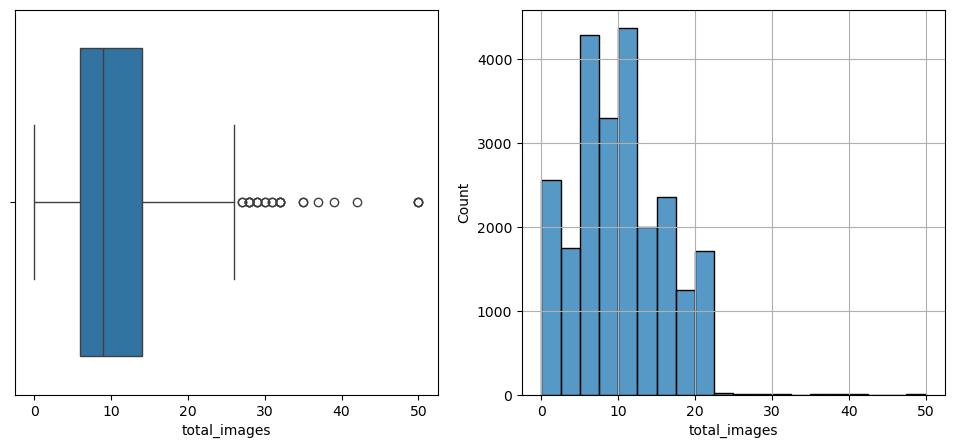

In [42]:
draw_box_and_hist_plots(data, 'total_images')

Отдельно изучим правую часть гистограммы.

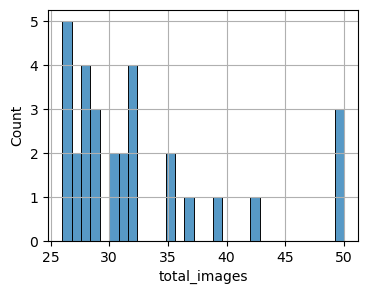

In [43]:
plt.figure(figsize=(4,3))
sns.histplot(data, x='total_images', binrange=(26, 50), bins=30)
plt.grid()

Все значения, большие `26` являются выбросами. Изучим их детальнее.

In [44]:
data.query('total_images > 26').sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_num,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
99,32,9600000.0,90.0,2017-09-26,4,2.65,5.0,67.0,2,0,False,False,8.0,0,Санкт-Петербург,23277.0,2818.0,0,NaN,0,NaN,104.0
5349,31,11990000.0,92.5,2017-12-07,3,2.65,25.0,51.4,22,0,False,False,15.0,1,Санкт-Петербург,30546.0,11209.0,1,433.0,1,700.0,47.0
4551,28,5500000.0,59.0,2017-09-27,2,2.70,23.0,33.0,12,0,False,False,11.5,2,Санкт-Петербург,21928.0,17256.0,0,NaN,1,429.0,333.0
21199,37,11500000.0,65.7,2018-02-01,2,2.65,25.0,23.0,10,0,False,False,21.0,2,Санкт-Петербург,10663.0,12738.0,0,NaN,0,NaN,64.0
3344,27,23500000.0,134.0,2017-11-10,4,2.65,16.0,59.0,14,0,False,False,37.0,5,Санкт-Петербург,31344.0,6673.0,1,545.0,1,198.0,90.0


Все остальные признаки в данном строке нормальные. Поэтому воспользуемся принципом описанном выше.

In [45]:
mask = data['total_images'] > 26
data.loc[mask, 'total_images'] = np.nan

### 4.4. <a id='toc4_4_'></a>Столбец `last_price`       [&#8593;](#toc0_)

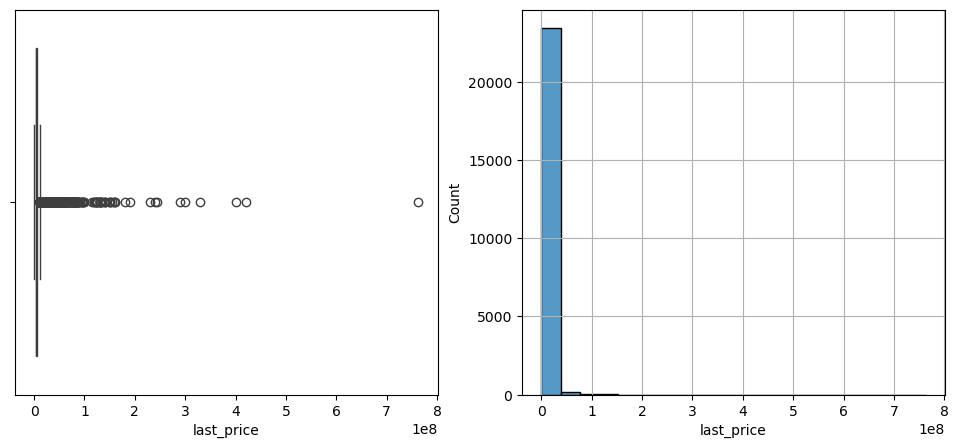

In [46]:
draw_box_and_hist_plots(data, 'last_price')

Выбросов слишком много. Данный признак является ключевым (по сути, таргетом), поэтому тут заменять значения медианой - не самая лучшая идея. Точечно избавимся от выбросов, заменим их на `NaN`.

In [47]:
data = delete_outliers_values(data, 'last_price')

Проверим внесенные изменения.

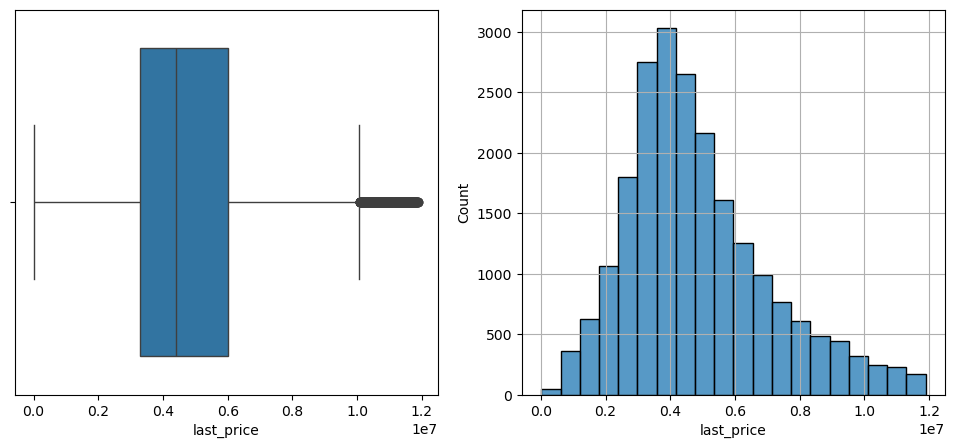

In [48]:
draw_box_and_hist_plots(data, 'last_price')

### 4.5. <a id='toc4_5_'></a>Столбец `total_area`       [&#8593;](#toc0_)

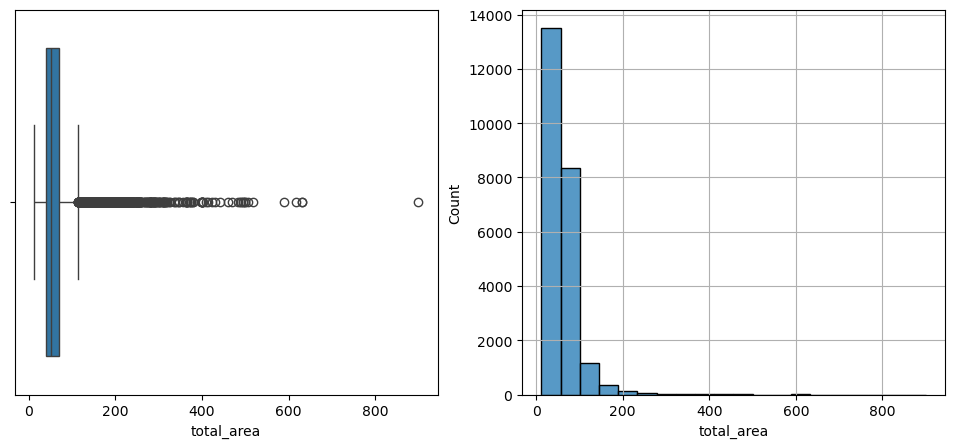

In [49]:
draw_box_and_hist_plots(data, 'total_area')

Отдельно изучим правую часть гистограммы.

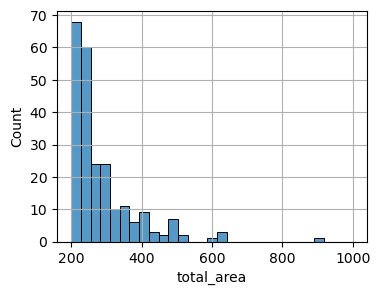

In [50]:
plt.figure(figsize=(4,3))
sns.histplot(data, x='total_area', binrange=(200, 1000))
plt.grid()

Выбросов также очень много. Тоже заменим их на `NaN`.

In [51]:
data = delete_outliers_values(data, 'total_area')

Проверим внесенные изменения.

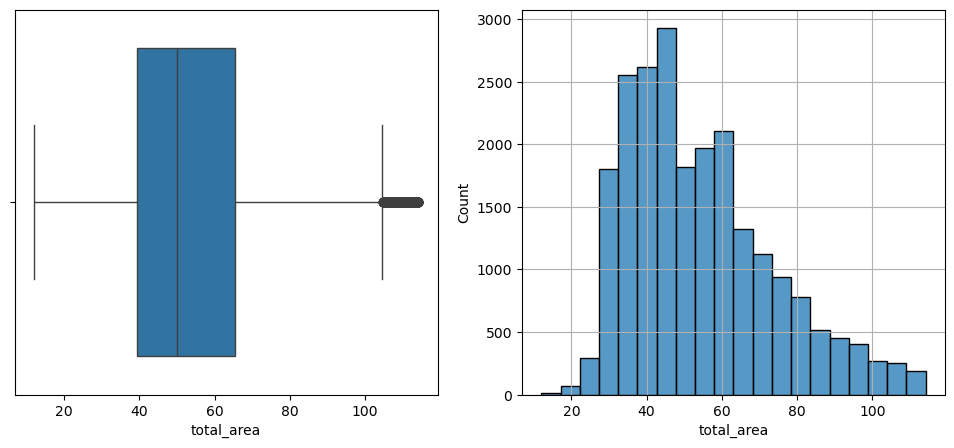

In [52]:
draw_box_and_hist_plots(data, 'total_area')

### 4.6. <a id='toc4_6_'></a>Столбец `rooms`    [&#8593;](#toc0_)

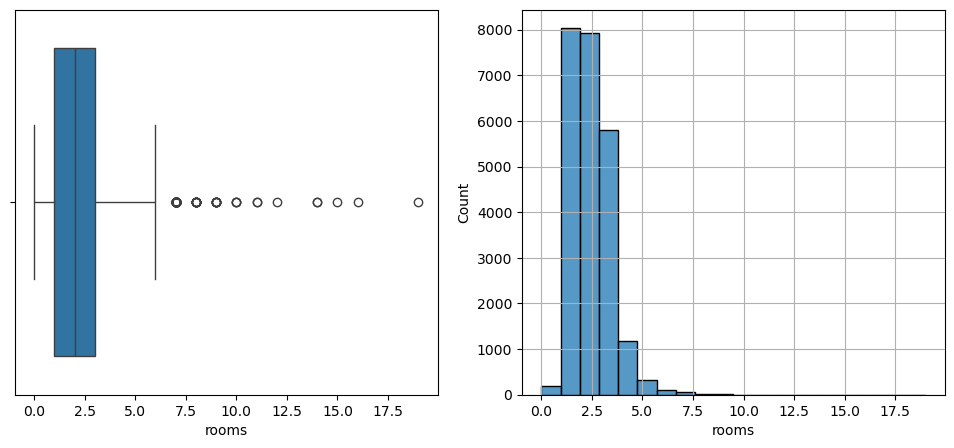

In [53]:
draw_box_and_hist_plots(data, 'rooms')

Видим всего несколько серьезных выбросов. Заменим их на `NaN`.

In [54]:
mask = data['rooms'] > 12
data.loc[mask, 'rooms'] = np.nan

### 4.7. <a id='toc4_7_'></a>Столбец `floors_total`    [&#8593;](#toc0_)

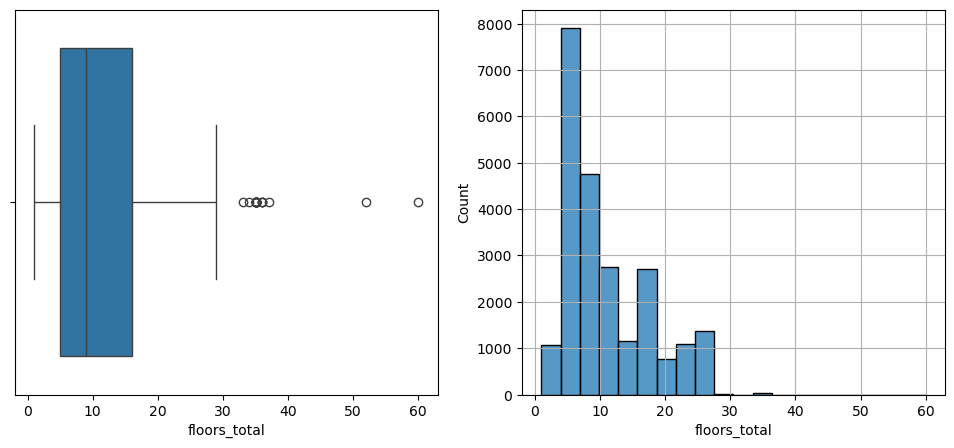

In [55]:
draw_box_and_hist_plots(data, 'floors_total')

Всего несколько серьезных выбросов. Заменим их на `NaN`.

In [56]:
mask = data['floors_total'] > 40
data.loc[mask, 'floors_total'] = np.nan

### 4.8. <a id='toc4_8_'></a>Столбец `floor_num`    [&#8593;](#toc0_)

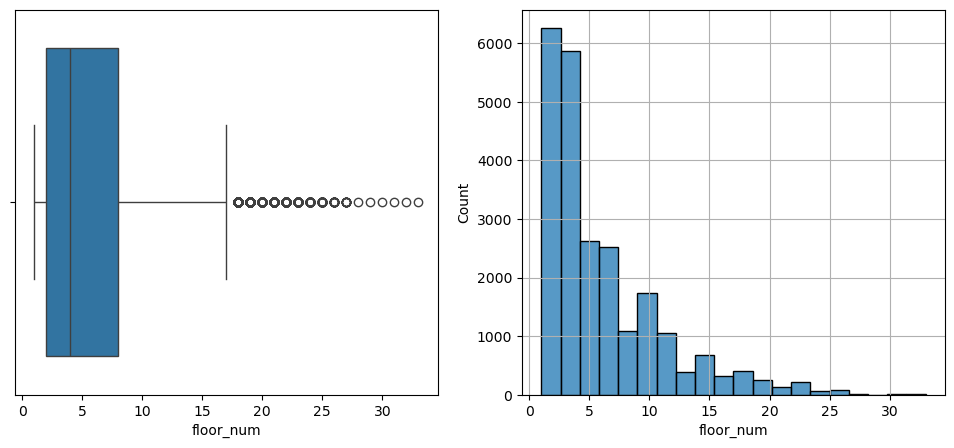

In [57]:
draw_box_and_hist_plots(data, 'floor_num')

В данном случае выход за границы не такой большой. Оставим как есть.

### 4.9. <a id='toc4_9_'></a>Столбец `kitchen_area`    [&#8593;](#toc0_)

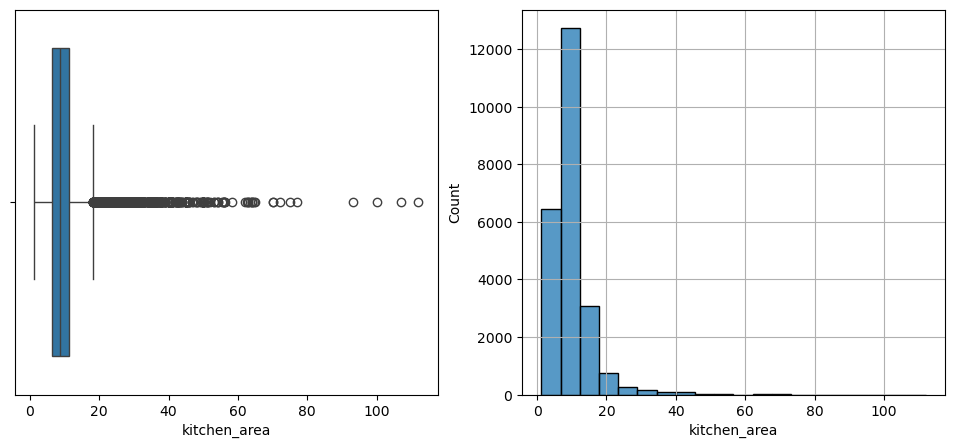

In [58]:
draw_box_and_hist_plots(data, 'kitchen_area')

Изучим отдельно правую часть гистограммы.

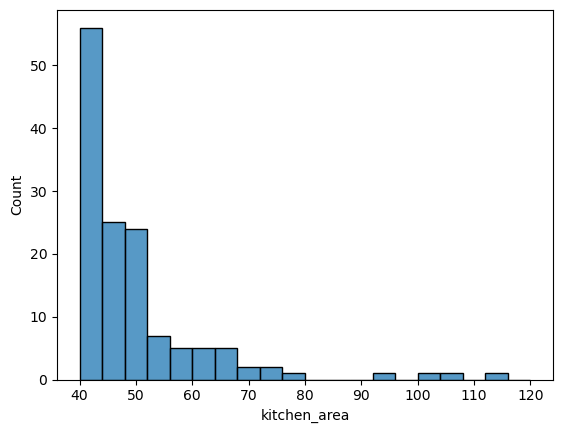

In [59]:
sns.histplot(data, x='kitchen_area', bins=20, binrange=(40, 120));

Значения больше `50` заменим на `NaN`.

In [60]:
mask = data['kitchen_area'] > 50
data.loc[mask, 'kitchen_area'] = np.nan

### 4.10. <a id='toc4_10_'></a>Столбец `living_area`    [&#8593;](#toc0_)

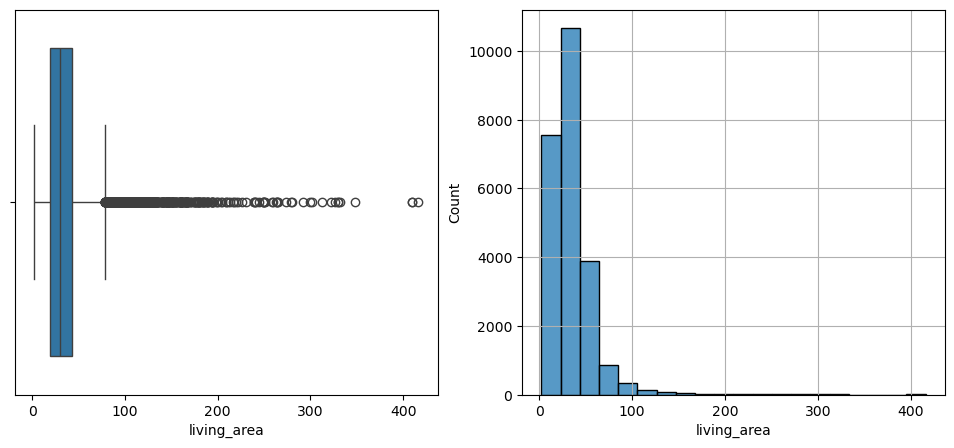

In [61]:
draw_box_and_hist_plots(data, 'living_area')

Изучим отдельно правую часть.

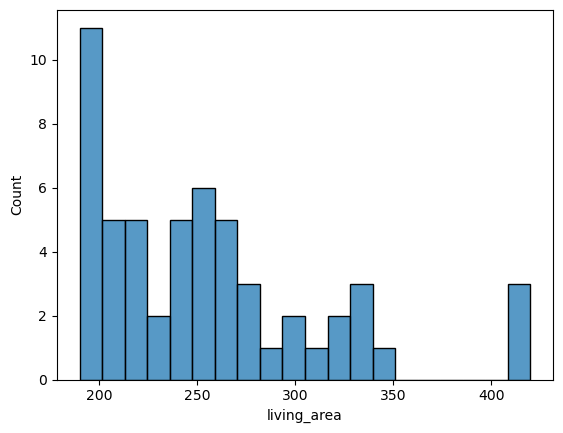

In [62]:
sns.histplot(data, x='living_area', bins=20, binrange=(190, 420));

Всего несколько серьезных выбросов. Заменим их на `NaN`.

In [63]:
mask = data['living_area'] > 190
data.loc[mask, 'living_area'] = np.nan

### 4.11. <a id='toc4_11_'></a>Столбец `days_exposition`    [&#8593;](#toc0_)

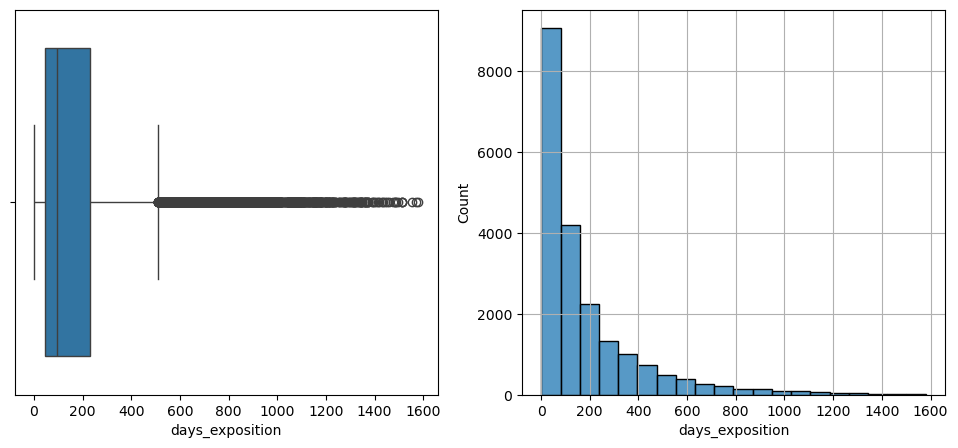

In [64]:
draw_box_and_hist_plots(data, 'days_exposition')

Изучим отдельно правую часть.

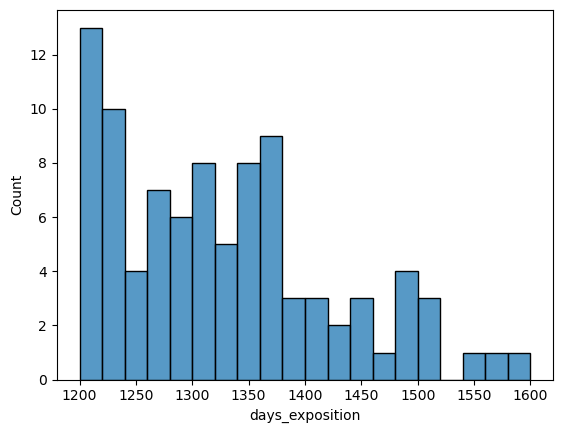

In [65]:
sns.histplot(data, x='days_exposition', bins=20, binrange=(1200, 1600));

Заменим все эти значения на `NaN`.

In [66]:
mask = data['days_exposition'] > 1200
data.loc[mask, 'days_exposition'] = np.nan

### 4.12. <a id='toc4_12_'></a>Столбцы с расстояниями    [&#8593;](#toc0_)

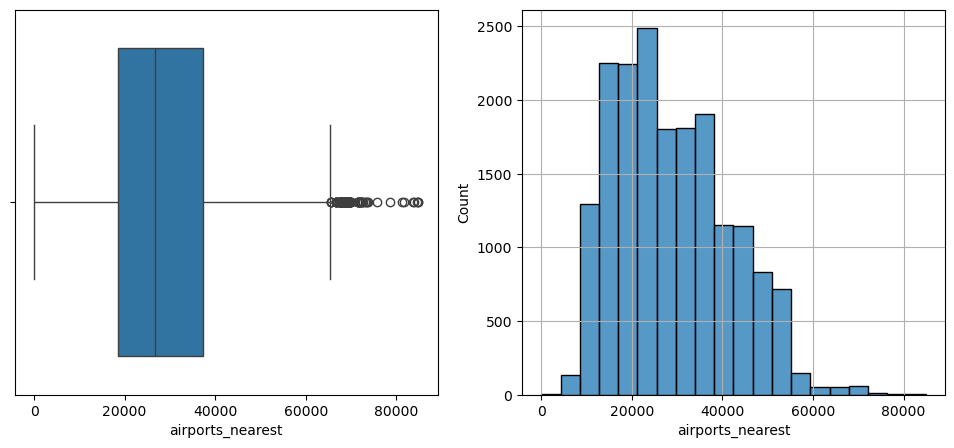

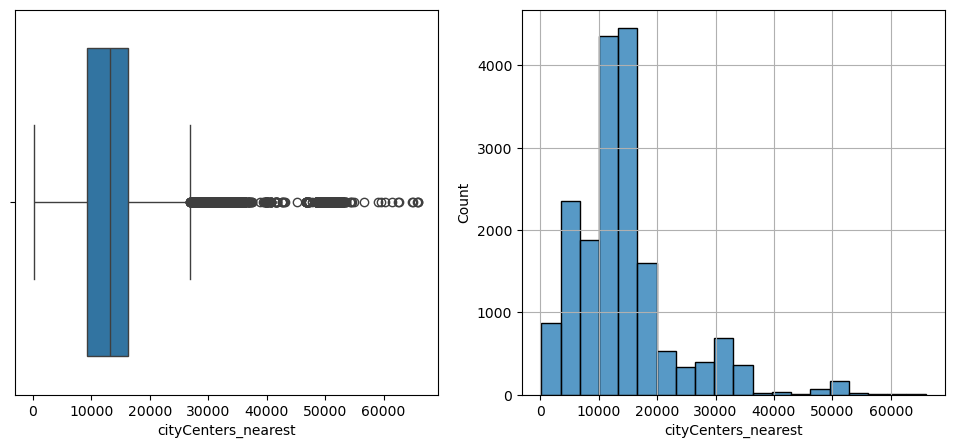

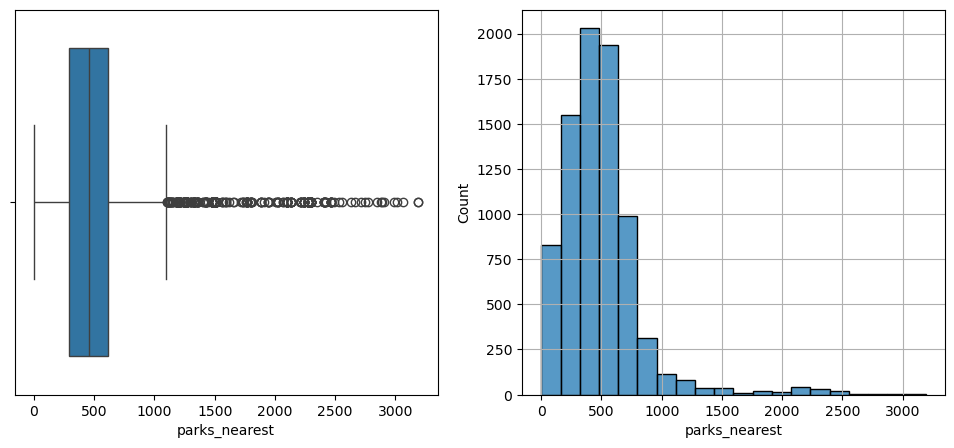

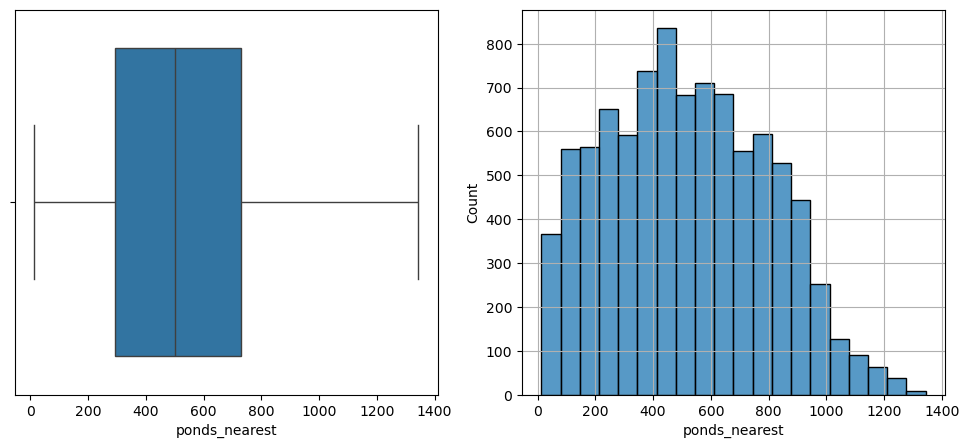

In [67]:
for col in ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']:
    draw_box_and_hist_plots(data, col)

In [68]:
localities_count = data.groupby('locality_name')['locality_name'].count()

for col in ['airports_nearest', 'cityCenters_nearest', 'parks_nearest']:
    q1, q3 = data[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    up_lim = q3 + 1.5 * iqr
    
    print(f'Outliers in "{col}" column')
    mask = data[col] > up_lim
    outliers = data.loc[mask, 'locality_name'].value_counts() / localities_count * 100
    display(outliers[~outliers.isna()].sort_values())
    print('\n' * 3)

Outliers in "airports_nearest" column


locality_name
Кронштадт              73.958333
Зеленогорск           100.000000
посёлок Молодёжное    100.000000
dtype: float64





Outliers in "cityCenters_nearest" column


locality_name
Санкт-Петербург              0.095414
посёлок Щеглово              4.347826
посёлок Песочный            25.000000
посёлок Шушары              42.272727
посёлок Лисий Нос           50.000000
Пушкин                      63.143631
посёлок Металлострой        90.909091
Красное Село                98.876404
Кронштадт                   98.958333
Ломоносов                   99.248120
Колпино                     99.704142
посёлок Усть-Ижора         100.000000
посёлок Сапёрный           100.000000
посёлок Репино             100.000000
посёлок Понтонный          100.000000
посёлок Петро-Славянка     100.000000
Зеленогорск                100.000000
посёлок Белоостров         100.000000
поселок Лисий Нос          100.000000
Сестрорецк                 100.000000
Петергоф                   100.000000
Павловск                   100.000000
посёлок Молодёжное         100.000000
посёлок Александровская    100.000000
dtype: float64





Outliers in "parks_nearest" column


locality_name
Сестрорецк         1.092896
Санкт-Петербург    1.838305
Колпино            4.142012
Петергоф           4.477612
dtype: float64

В столбце`parks_nearest` выбросов совсем небольшое количество. Явной закономерности в распределении по населенным пунктам не наблюдается.

In [69]:
data = delete_outliers_values(data, 'parks_nearest')

А вот для столбцов `cityCenters_nearest` `airports_nearest` данные выбросы вполне оправданы, так как соответствуют очень удаленным населенным пунктам.

Проверим внесенные изменения.

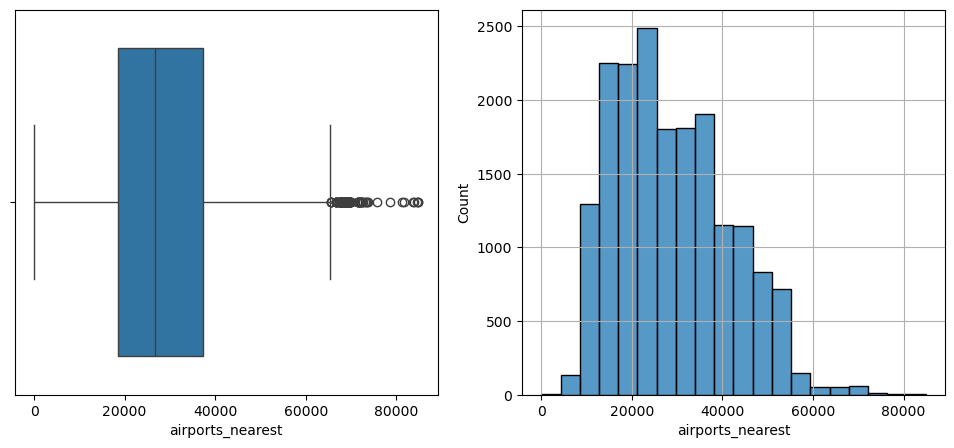

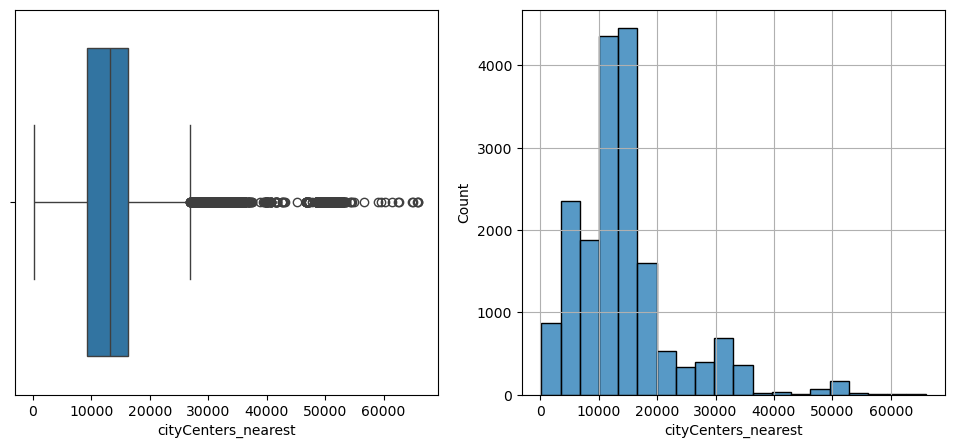

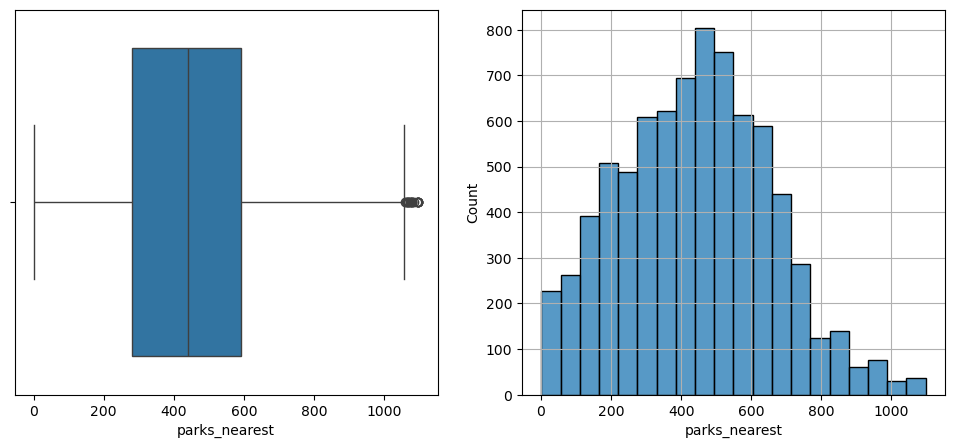

In [70]:
for col in ['airports_nearest', 'cityCenters_nearest', 'parks_nearest']:
    draw_box_and_hist_plots(data, col)

### 4.13. <a id='toc4_13_'></a>Вывод по аномальным значениям          [&#8593;](#toc0_)

Еще раз проверим распределения столбцов.

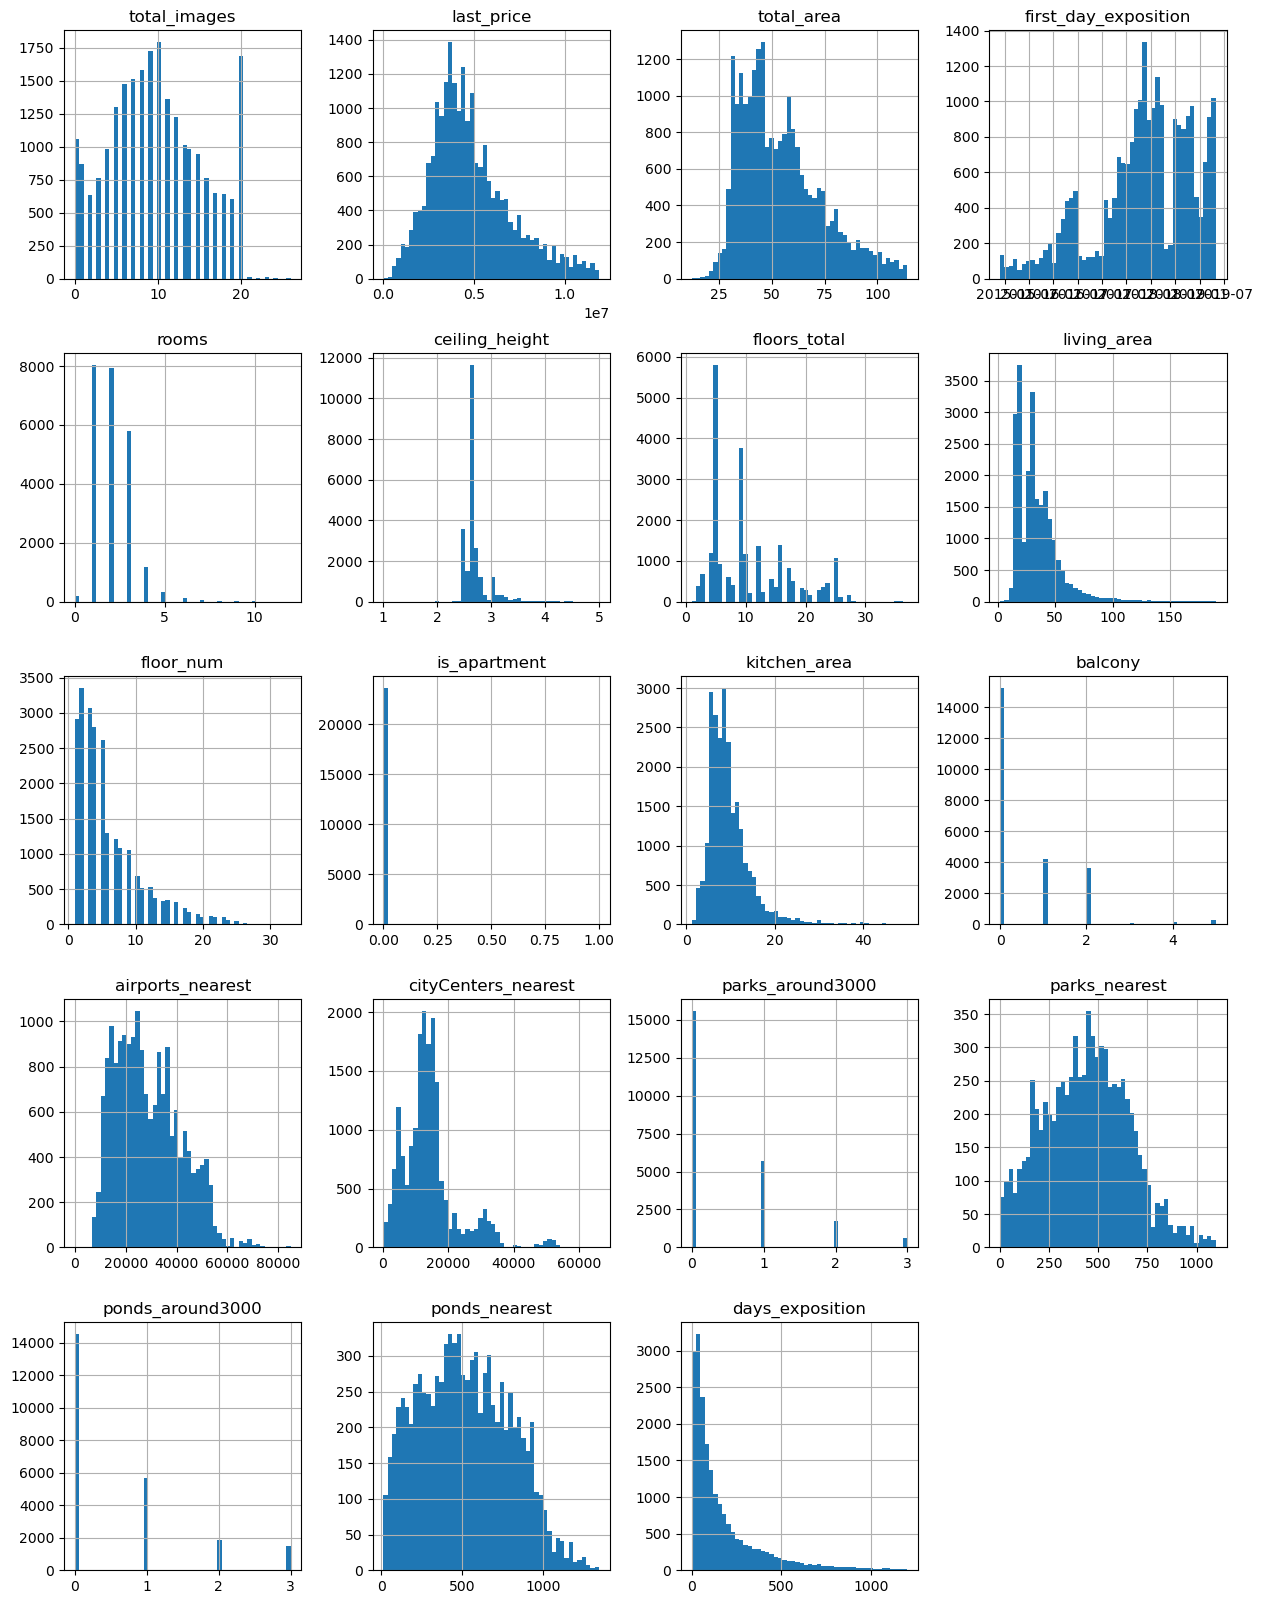

In [71]:
data.hist(bins=50, figsize=(15, 20));

Выбросы и аномальные значения были в большей части столбцов. Если природа выбросов была ясна - проводилась соответствующая обработка. В остальных случаях принималось решении об оставление данных или замене на `NaN`.

## 5. <a id='toc5_'></a>Обработка дубликатов                [&#8593;](#toc0_)

In [72]:
data['locality_name'].nunique()

364

In [73]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [74]:
data['locality_name'] = (data['locality_name']
    .str.lower()
    .str.replace('ё', 'е')
    .str.replace('городского типа', '')
    .str.replace(r'^городской', '', regex=True)
    .str.replace(r'деревня', '', regex=True)
    .str.replace(r'поселок', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip())

In [75]:
data['locality_name'].nunique()

313

In [76]:
data['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'садовое товарищество новая ропша', 'павловск',
       'пикколово', 'всеволожск', 'волхов', 'кингисепп', 'приозерск',
       'сестрорецк', 'куттузи', 'аннино', 'ефимовский', 'плодовое',
       'заклинье', 'торковичи', 'первомайское', 'красное село',
       'понтонный', 'сясьстрой', 'старая', 'лесколово', 'новый свет',
       'сланцы', 'село путилово', 'ивангород', 'шлиссельбург',
       'никольское', 'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино',
       'романовка', 'бугры', 'рощино', 'кириши', 'луга', 'волосово',
       'отрадное', 'село павлово', 'оредеж', 'село копорье', 'молодежное',
       'тихвин', 'победа', 'нурма', 'синявино', 

### 5.1. <a id='toc5_1_'></a>Вывод по дубликатам           [&#8593;](#toc0_)

В данном датасете дубликаты возможны только в одном столбце - `locality_name`. Было принято решение оставить только названия населенных пунктов. Таким образом мы избавились от неточностей, так как, например `поселок` и `посёлок`.

## 6. <a id='toc6_'></a> Генерация новых столбцов (feature engineering)   [&#8593;](#toc0_)

In [77]:
data['square_meter_price'] = (data['last_price'] / data['total_area']).round(2)

In [78]:
data['publication_day'] = data['first_day_exposition'].dt.day_of_week

In [79]:
data['publication_month'] = data['first_day_exposition'].dt.month

In [80]:
data['publication_year'] = data['first_day_exposition'].dt.year

In [81]:
def get_floor_type(row: pd.Series) -> str:
    if row['floor_num'] == 1:
        return 'первый'
    elif row['floor_num'] == row['floors_total']:
        return 'последний'
    
    return 'другой'

In [82]:
data['floor_type'] = data.apply(get_floor_type, axis=1)

In [83]:
data['cityCenters_nearest_in_km'] = (data['cityCenters_nearest'] / 1000).round()

Проверим, что новые столбцы добавлены в датафрейм.

In [84]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_num,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,publication_day,publication_month,publication_year,floor_type,cityCenters_nearest_in_km
0,20.0,NaN,108.0,2019-03-07,3.0,2.70,16.0,51.000000,8,0,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,NaN,3,3,2019,другой,16.0
1,7.0,3350000.0,40.4,2018-12-04,1.0,2.65,11.0,18.600000,1,0,False,False,11.000000,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10.0,5196000.0,56.0,2015-08-20,2.0,2.65,5.0,34.300000,4,0,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0.0,NaN,NaN,2015-07-24,3.0,2.65,14.0,104.906466,9,0,False,False,16.288668,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,NaN,4,7,2015,другой,7.0
4,2.0,10000000.0,100.0,2018-06-19,2.0,3.03,14.0,32.000000,13,0,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0


## 7. <a id='toc7_'></a>Проверка типов данных   [&#8593;](#toc0_)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               23625 non-null  float64       
 1   last_price                 21595 non-null  float64       
 2   total_area                 22406 non-null  float64       
 3   first_day_exposition       23650 non-null  datetime64[ns]
 4   rooms                      23645 non-null  float64       
 5   ceiling_height             23635 non-null  float64       
 6   floors_total               23648 non-null  float64       
 7   living_area                23597 non-null  float64       
 8   floor_num                  23650 non-null  int64         
 9   is_apartment               23650 non-null  int64         
 10  studio                     23650 non-null  bool          
 11  open_plan                  23650 non-null  bool          
 12  kitchen_a

В итоге тип данных был изменен в 2 столбцах:
- `first_day_exposition` (`str` -> `datetime`)
- `is_apartment` (`str` -> `int`)

## 8. <a id='toc8_'></a> EDA (исследовательский анализ данных)                   [&#8593;](#toc0_)

### 8.1. <a id='toc8_1_'></a>Изучение скорости продаж квартир          [&#8593;](#toc0_)

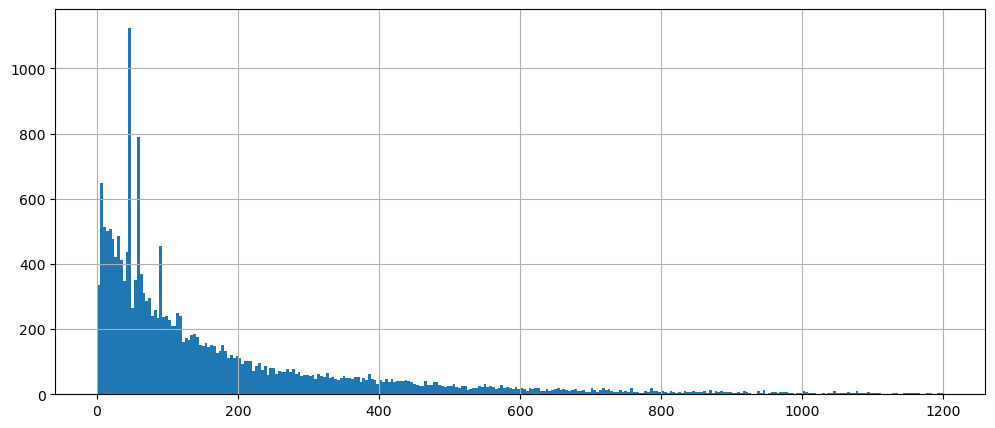

In [86]:
data['days_exposition'].hist(bins=300, figsize=(12, 5));

In [87]:
data[['days_exposition']].describe()

,days_exposition
count,20379.000000
mean,175.623191
std,206.292504
min,1.000000
25%,45.000000
50%,95.000000
75%,228.000000
max,1200.000000


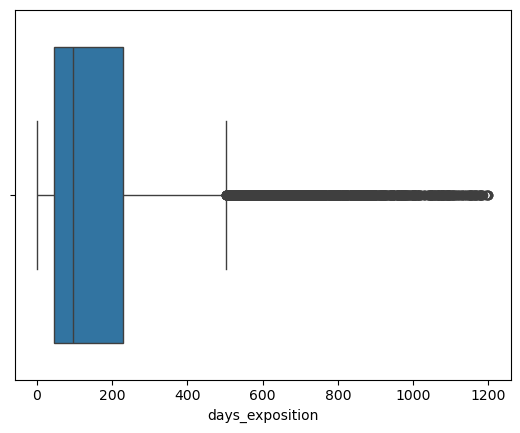

In [88]:
sns.boxplot(data=data['days_exposition'], orient='h');

In [89]:
print(f'Средняя скорость продажи квартиры: {data["days_exposition"].mean():.0f} дня(-ей)')
print(f'Медианная скорость продажи квартиры: {data["days_exposition"].median():.0f} дня(-ей)')

q1, q3 = data['days_exposition'].quantile([0.25, 0.75])
print(f'\nОбласть нормальных значений - [{q1:.0f}; {q3:.0f}]')

Средняя скорость продажи квартиры: 176 дня(-ей)
Медианная скорость продажи квартиры: 95 дня(-ей)

Область нормальных значений - [45; 228]


**Вывод:**

В среднем квартиры продаются за `95` дней, то есть около `3` месяцев. Слишком долгой продажей можно считать ту, которая занимает более  `228` дней. К слишком быстрой продаже можно отнести первый квартиль и всё до него - то есть если квартира продана быстрее, за `45` дней.

### 8.2. <a id='toc8_2_'></a>Зависимость цены квартиры от расстояния до центра          [&#8593;](#toc0_)

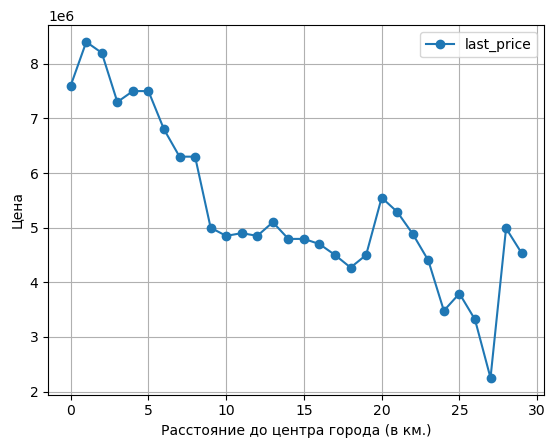

In [90]:
(data
    .query('locality_name == "санкт-петербург"')
    .pivot_table(index='cityCenters_nearest_in_km',
                 values='last_price',
                 aggfunc='median')
    .plot(style='o-',
          grid=True,
          xlabel='Расстояние до центра города (в км.)',
          ylabel='Цена'));

Результаты практически полностью поддаются объяснению.

- В самом центре Питера довольно старые дома, поэтому цена на них ожидаемо ниже, чем на недвижимость чуть дальше от центра.
- Далее идет логичное снижение. Чем дальше от центра квартира - тем дешевле она стоит.
- Единственный не совсем логичный всплеск на значениях 18-20 км. Рост цены составляет примерно 1 млн. рублей (около 20%). Возможно, сказалась обработка пропусков, которая несколько исказила данные. В любом случае, требуется дополнительное изучение.

### 8.3. <a id='toc8_3_'></a>Средняя цена квадратного метра в 10 самых популярных населенных пунктах   [&#8593;](#toc0_)

In [91]:
most_popular_localities = data.groupby('locality_name')['locality_name'].agg('count').sort_values(ascending=False)[:10].index
mean_square_meter_price = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'mean']).loc[most_popular_localities]
mean_square_meter_price.columns = ['ad_count', 'mean_price_of_square_meter']
mean_square_meter_price.sort_values('mean_price_of_square_meter', ascending=False)

,ad_count,mean_price_of_square_meter
locality_name,,
санкт-петербург,13606,105684.892625
пушкин,336,100462.063512
кудрово,470,95152.072170
парголово,326,90332.262638
мурино,590,86087.512017
шушары,437,78704.891945
колпино,335,75221.876299
гатчина,303,68664.035611
всеволожск,394,67222.431447


Самая большая цена, ожидаемо, в самом Санкт-Петербурге. Как и количество объявлений. Обнаружено `13.5 тысяч` объявлений со средней ценой квадратного метра `106 тысяч` рублей.

Самый дешевый квадратный метр обнаружен в Выборге. Всего `58 тысяч` рублей. И сравнительно небольшое количество объявление - чуть больше `200`. 

### 8.4. <a id='toc8_4_'></a>Факторы с наибольшим влиянием на цену        [&#8593;](#toc0_)

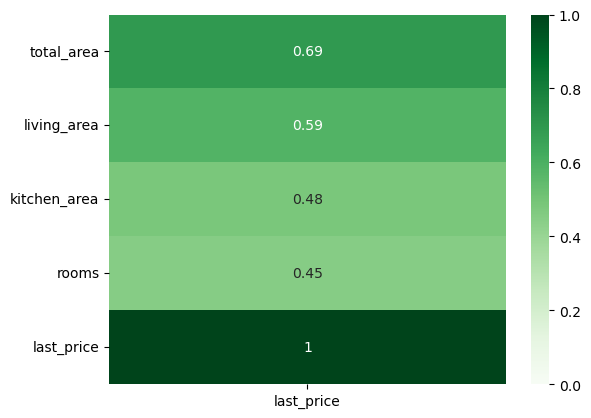

In [92]:
cols_to_analyze = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'last_price']
sns.heatmap(data=data[cols_to_analyze].corr()[['last_price']],
            annot=True,
            vmin=0,
            cmap='Greens');

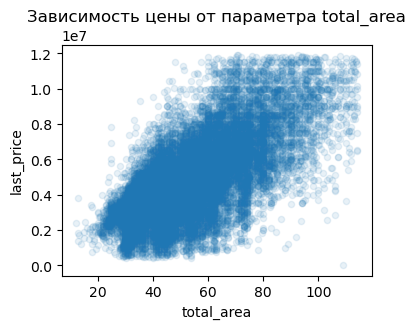

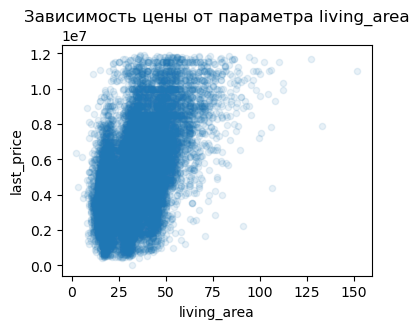

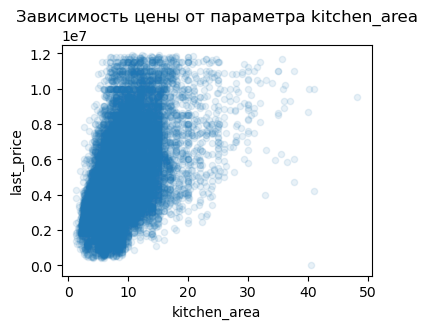

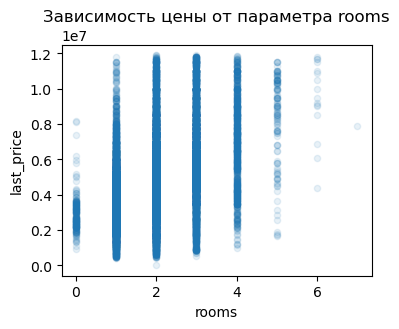

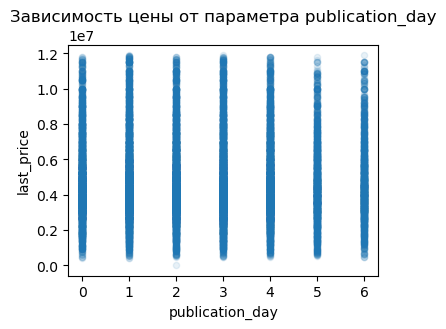

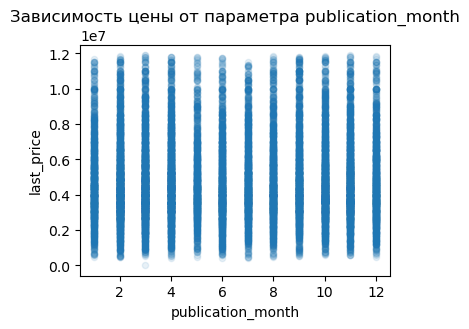

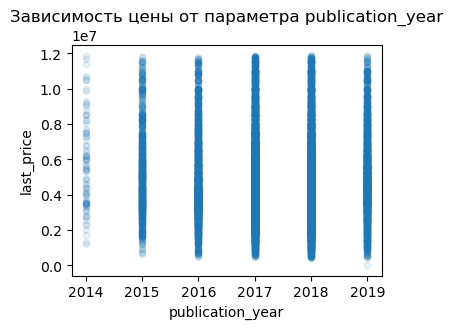

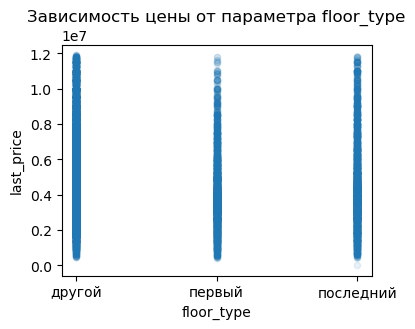

In [93]:
cols_to_analyze = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'publication_day', 'publication_month', 'publication_year', 'floor_type']

for col in cols_to_analyze:
    data.plot(kind='scatter',
              y='last_price',
              x=col,
              title=f'Зависимость цены от параметра {col}',
              figsize=(4, 3),
              alpha=0.1)
    plt.show()

Зависимости довольно ожидаемы. Площадь как всей недвижимости, так и ее отдельных частей (кухня, жилая зона) имеют среднюю и выше средней корреляцию с итоговой цены. Как и количество комнат.

А дата размещения абсолютно не имеет влияние на итоговую стоимость.

## 9. <a id='toc9_'></a>Общий вывод                    [&#8593;](#toc0_)

В рамках данного исследования были проделаны следующие шаги по предобработке:

- Изменение типов данных столбцов в случае необходимости
- Заполнение пропусков. Если было возможно - пропуски заполнение ожидаемым значением. В остальных случаях - медианой или рассчитанными значениями.
- Обработка выбросов и аномальных значений. Если причина аномалий понятна - данные обрабатывались. В остальных случаях - выбросы и аномалии точечно заменялись на `np.nan`, чтобы данные значения не участвовали в исследовании.

---

Далее быи добавлены новые столбцы, такие как:
- день, месяц и год публикации объявления
- цена 1 квадратного метра
- тип этажа(первый, последний, другой)
- расстояние от центра в км.

---

В конце были исследованы различные зависимости.

1) Изучение скорости продаж квартиры. В итоге был сделан вывод, что квартира продается в среднем за 95 дней. Однако есть как совсем быстрые продажи (1 день), так и совсем долгие, вплоть до 1200 дней.
2) Зависимость цены квартиры от расстояния до центра. В данном пункте зависимость практически обратная. Чем дальше квартира от центра - тем дешевле. Однако недвижимость в самом центре чуть дешевле из-за состояния домов. Также необычный всплеск на расстоянии 20 км.
3) Средняя цена квадратного метра в различных локациях. Самая дорогая недвижимость в Санкт-Петербурге (106 тысяч рублей за кв. м.), а самая дешевая в Выборге (58 тысяч рублей).
4) Зависимость цены от различных параметров. Цена имеет прямую зависимость от площади жилья. А вот дата размещения объявления абсолютно не влияет на цену.